# id5059 Predicting Liver Cirrhosis Outcomes (Group Project 2024)

### Load the synthetic dataset from Kaggle

In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# I. Correlations Exploration

## Notable insights
##### feature vs status 
* Ascites and Y category of edema were strong predictors of D class 
* Sex / hepatomegaly / spiders / stage / age / bilirubin / albumin / copper in urine / SGOT/ platelets/ prothrombin influenced status.
##### feature vs feature
* Moderate negative correlation between N catagory of edema ascites (-0.53)
* Strong positive correlation between Y catagory of edema and ascites (0.66)
* Moderate positive correlation between stage and hepatomegaly (0.5)
* no significant non-linear relationships were found between features. 

## Importing packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Looking for relationships between features and status

### Catagorical variables

In [3]:
# function used to create pivot table to draw stacked bar chart
def createPivotTable(data, variable): 
    # Group the data by 'Drug' and 'Status' and count the occurrences
    grouped = data.groupby([variable, 'Status']).size().reset_index(name='Count')
    total_patients_per_variable  = grouped.groupby(variable)['Count'].transform('sum')
    grouped['Proportion'] = grouped['Count'] / total_patients_per_variable
    pivot_df = grouped.pivot(index=variable, columns='Status', values='Proportion')
    return pivot_df

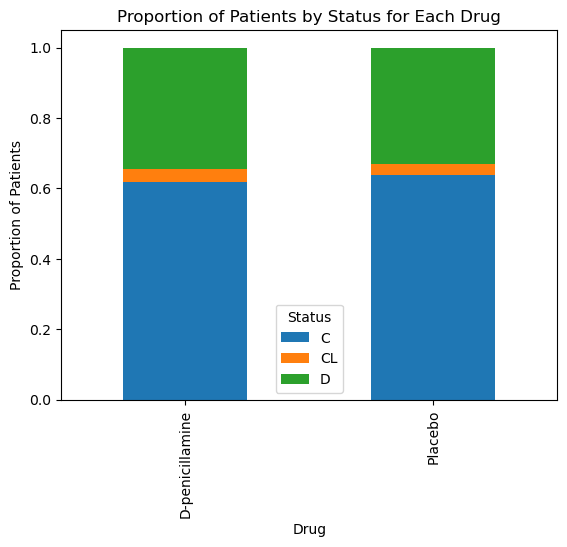

In [4]:
pivot_df = createPivotTable(df_train, 'Drug')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status for Each Drug')
plt.xlabel('Drug')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

#### Drug did not have a signicant effect on status. D-penillamine did not have significant effect on the in proportion the of patients in each class

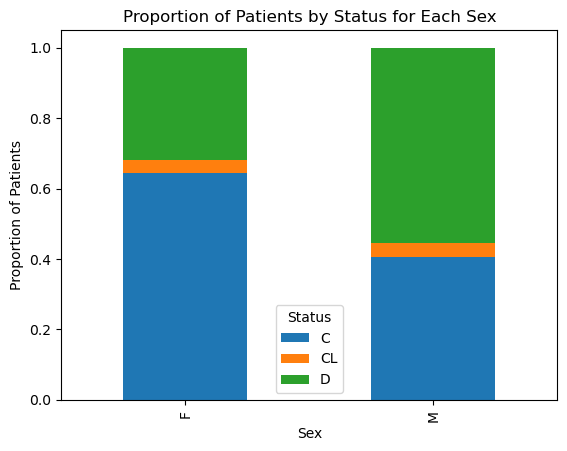

In [5]:
pivot_df = createPivotTable(df_train, 'Sex')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status for Each Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

#### Sex had a signficnat effect on status. Men had a higher proportion of patients in D class and lower proportion of patients in C class

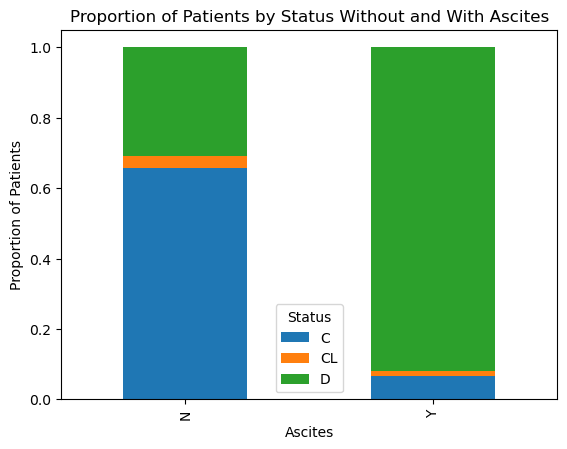

In [6]:
pivot_df = createPivotTable(df_train, 'Ascites')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status Without and With Ascites')
plt.xlabel('Ascites')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

### Ascites had a signficnat effect on status. Patients with ascites had a significantly higher proportion in D class and lower proportion in C class.

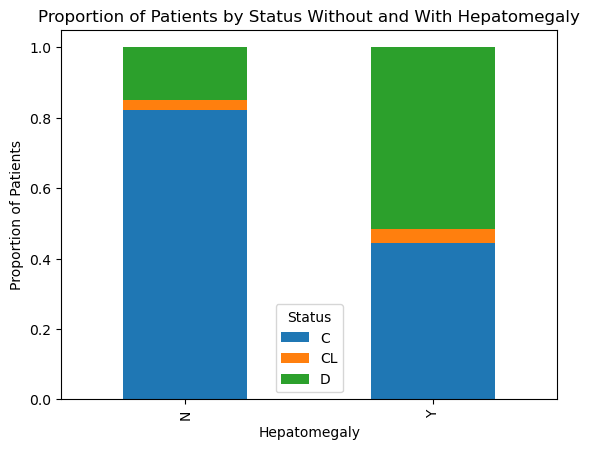

In [7]:
pivot_df = createPivotTable(df_train, 'Hepatomegaly')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status Without and With Hepatomegaly')
plt.xlabel('Hepatomegaly')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

#### Hepatomegaly had a signficant effect on status. Patients with hepatomegaly had a higher proportion in D class and lower in C class. 

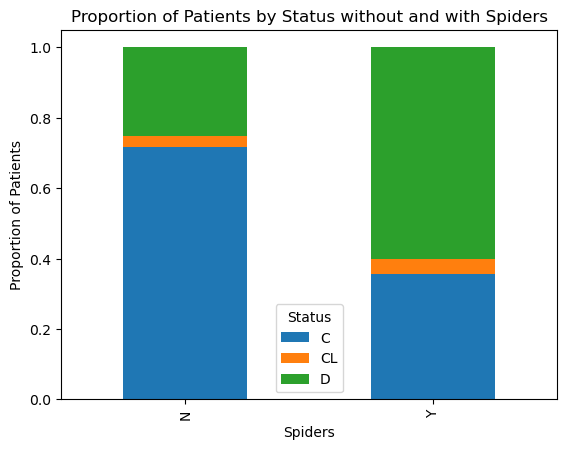

In [8]:
pivot_df = createPivotTable(df_train, 'Spiders')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status without and with Spiders')
plt.xlabel('Spiders')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

#### Spiders had a signficant effect on status. Patients with spiders had a higher proportion in D class and lower in C class. 

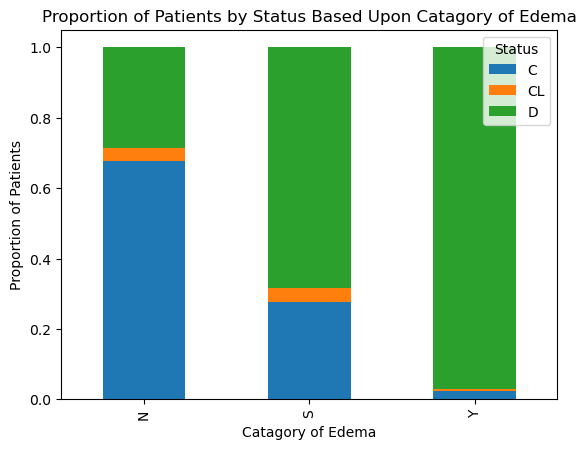

In [9]:
pivot_df = createPivotTable(df_train, 'Edema')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status Based Upon Catagory of Edema')
plt.xlabel('Catagory of Edema')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

##### Edema catagory had a signficant effect on status. Patients in Y and S class for Edema had significantly higher proportion of patients in D class. Higher proportion in Y than S. 

##### Description of edema variable: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

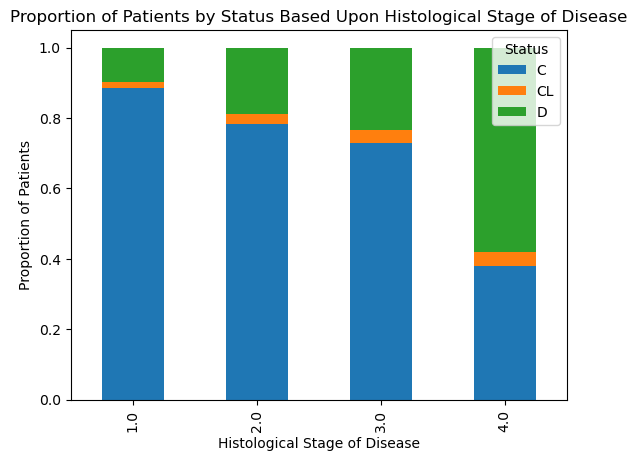

In [10]:
pivot_df = createPivotTable(df_train, 'Stage')
# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Proportion of Patients by Status Based Upon Histological Stage of Disease')
plt.xlabel('Histological Stage of Disease')
plt.ylabel('Proportion of Patients')

# Adding a legend
plt.legend(title='Status')

# Displaying the plot
plt.show()

#### Stage of disease had a signficant effect on status. Patients in stage 4 of disease had a significantly higher proportion in D class than 1,2,3. 2 and 3 were greater than 1. 2 and 3 were similar. 

### Continuous variables

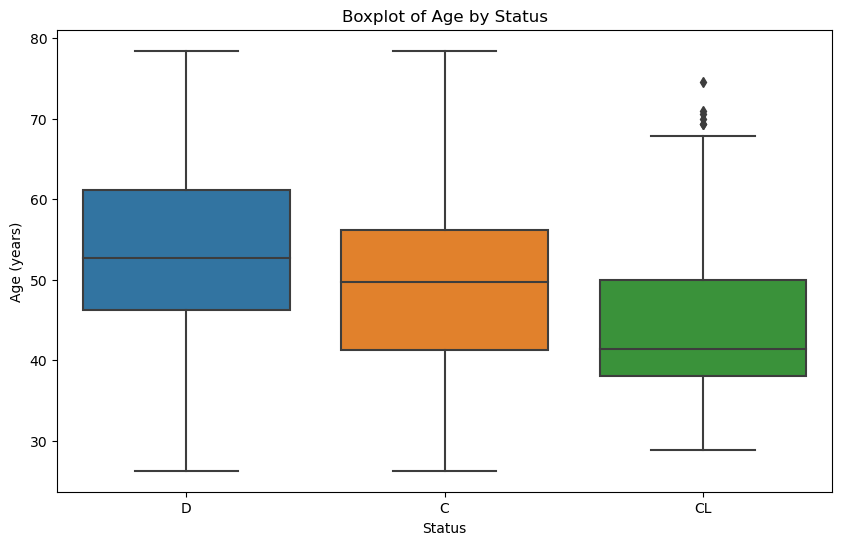

In [11]:
# Convert age from days to years for better readability
df_train['Age_years'] = df_train['Age'] / 365.25

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Age_years', data=df_train)
plt.title('Boxplot of Age by Status')
plt.xlabel('Status')
plt.ylabel('Age (years)')
plt.show()

#### Age had an effect on status. Patients in CL class were associated with a lower age 

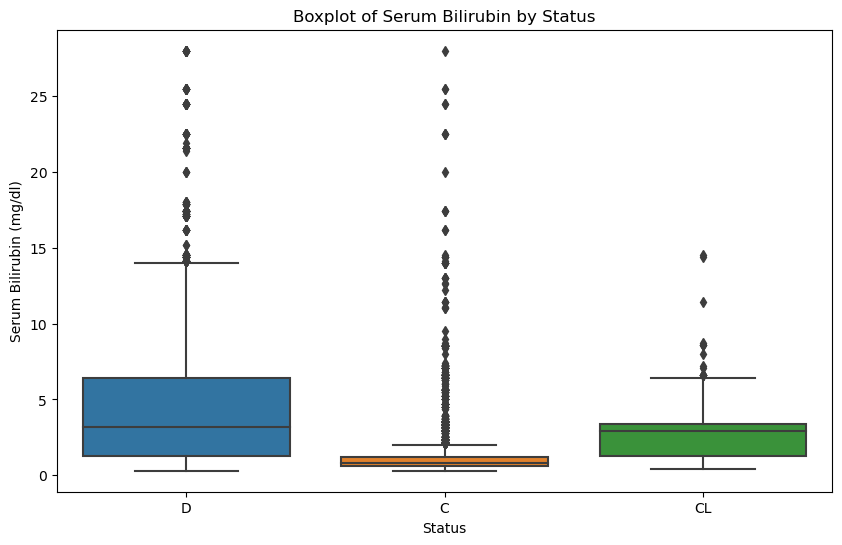

In [12]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Bilirubin', data=df_train)
plt.title('Boxplot of Serum Bilirubin by Status')
plt.xlabel('Status')
plt.ylabel('Serum Bilirubin (mg/dl)')
plt.show()

#### Bilirubin had an effect on status. Patients in C class had lower bilibrubin

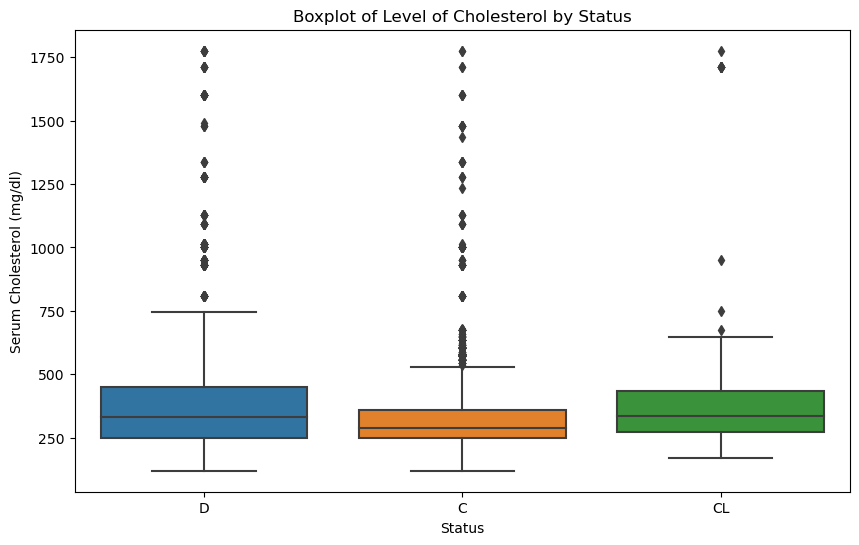

In [13]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Cholesterol', data=df_train)
plt.title('Boxplot of Level of Cholesterol by Status')
plt.xlabel('Status')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.show()

#### Cholesterol did not had an effect on status.

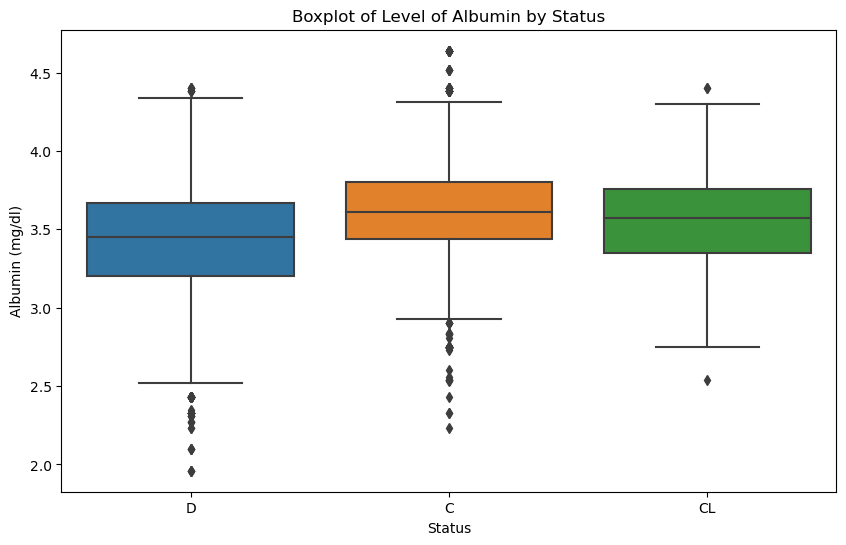

In [14]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Albumin', data=df_train)
plt.title('Boxplot of Level of Albumin by Status')
plt.xlabel('Status')
plt.ylabel('Albumin (mg/dl)')
plt.show()

#### Albumin had an effect on status. Patients in D class were associated with lower albumin

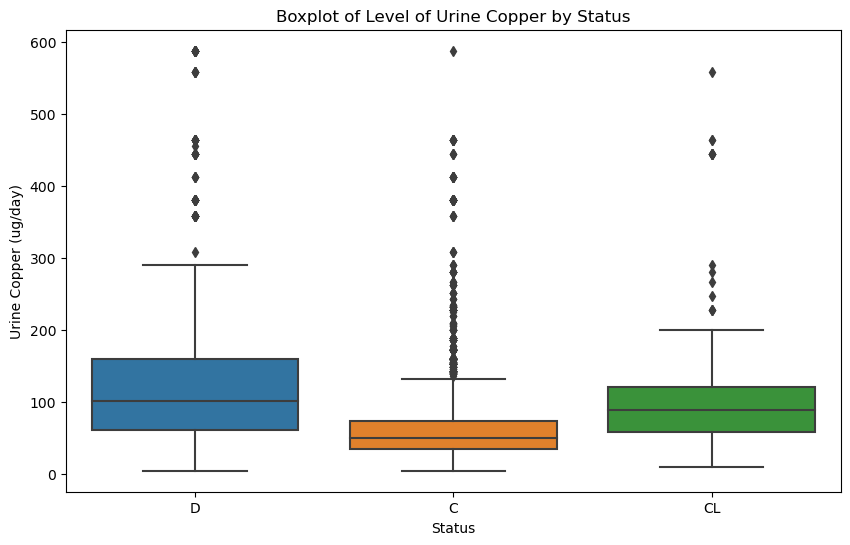

In [15]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Copper', data=df_train)
plt.title('Boxplot of Level of Urine Copper by Status')
plt.xlabel('Status')
plt.ylabel('Urine Copper (ug/day)')
plt.show()

#### Copper in urine had an effect on status. Patients in C class were associated with lower copper in urine

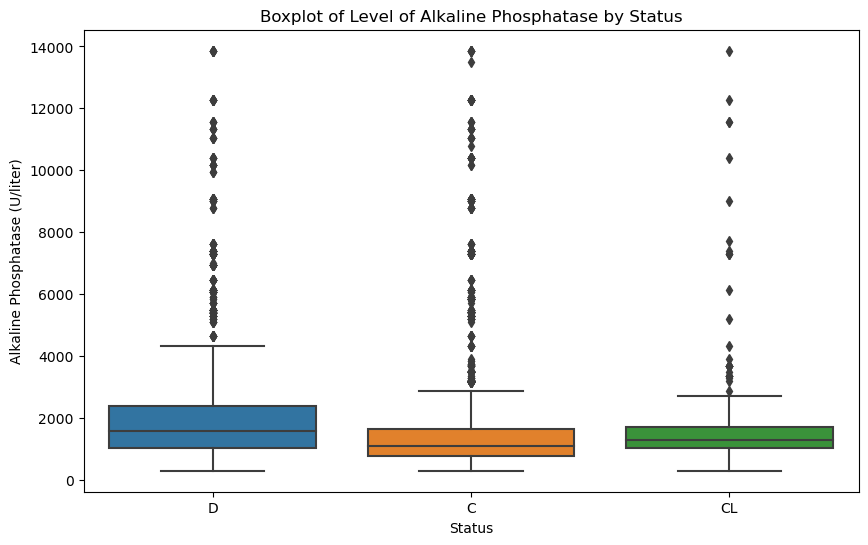

In [16]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Alk_Phos', data=df_train)
plt.title('Boxplot of Level of Alkaline Phosphatase by Status')
plt.xlabel('Status')
plt.ylabel('Alkaline Phosphatase (U/liter)')
plt.show()

#### Alkaline phosphotase did not have a significant effect on status.

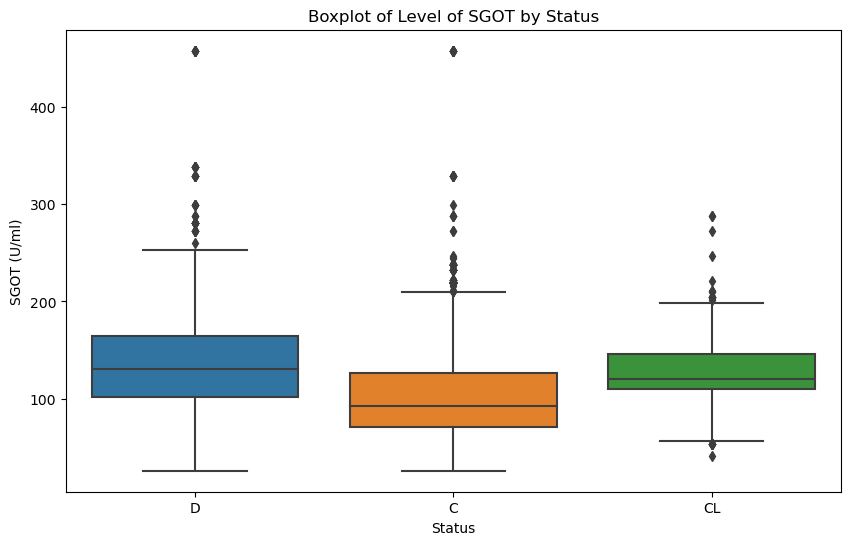

In [17]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='SGOT', data=df_train)
plt.title('Boxplot of Level of SGOT by Status')
plt.xlabel('Status')
plt.ylabel('SGOT (U/ml)')
plt.show()

#### SGOT had an effect on status. Patients in C class were associated with lower SGOT

#### SGOT - serum glutamic-oxaloacetic transaminase

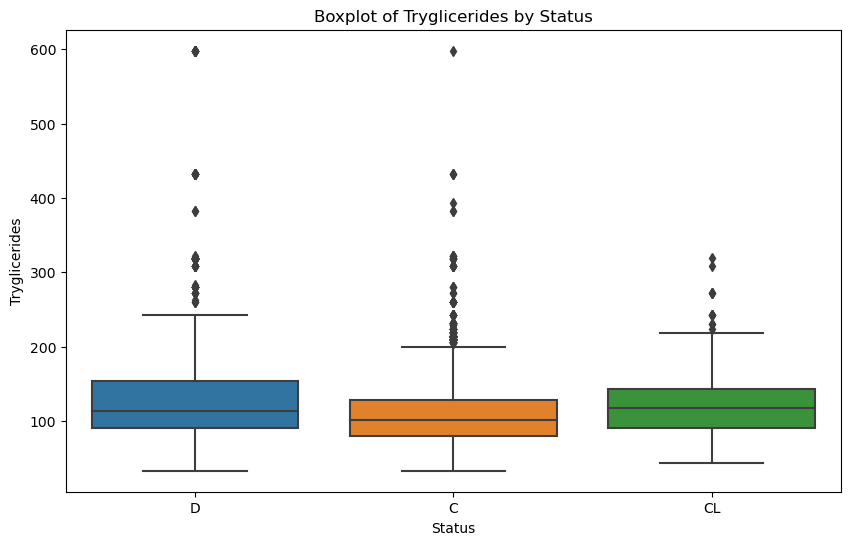

In [18]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Tryglicerides', data=df_train)
plt.title('Boxplot of Tryglicerides by Status')
plt.xlabel('Status')
plt.ylabel('Tryglicerides')
plt.show()

#### Triglicerides did not have a significant effect on status.

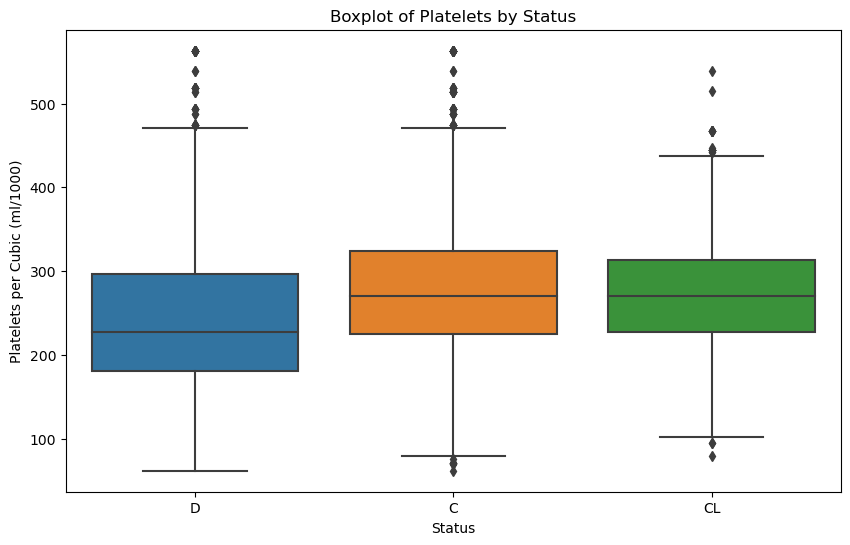

In [19]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Platelets', data=df_train)
plt.title('Boxplot of Platelets by Status')
plt.xlabel('Status')
plt.ylabel('Platelets per Cubic (ml/1000)')
plt.show()

#### Platelets had an effect on status. Patients in D class were associated with lower platelets

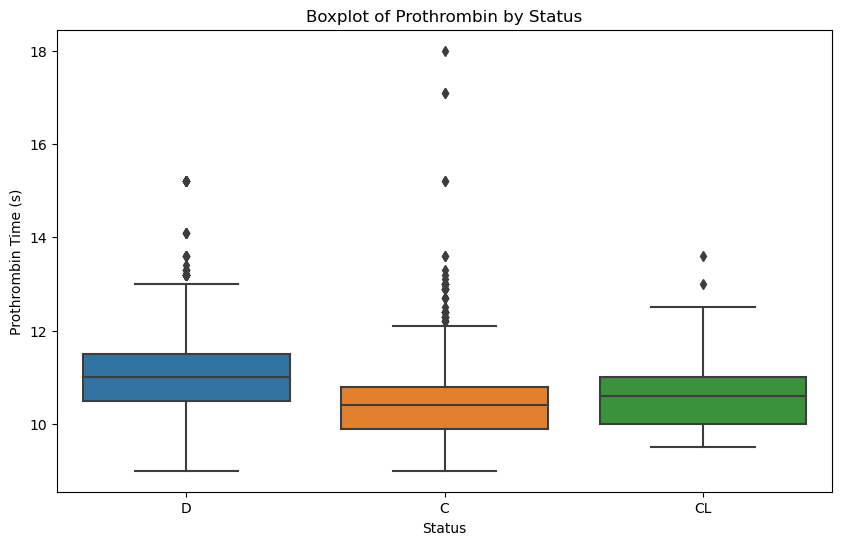

In [20]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Prothrombin', data=df_train)
plt.title('Boxplot of Prothrombin by Status')
plt.xlabel('Status')
plt.ylabel('Prothrombin Time (s)')
plt.show()

#### Prothrobin had an effect on status. Patients in D class were associated with higher prothrobin

## Looking for relationships between features and features

### Ordinal 
* Stage 

##### One hot encode catagorical 
* Sex                 
* Ascites             
* Hepatomegaly        
* Spiders             
* Edema                           
* Drug 

In [21]:
# Edema
data = {'Category': ['N', 'S', 'Y']}
df = df_train['Edema']
EdemaNumerical = pd.get_dummies(df, columns=['Category'])


In [22]:
df_train['SexNumerical'] = np.where(df_train['Sex']=='F', 1, 0)
df_train['AscitesNumerical'] = np.where(df_train['Ascites']=='N', 0, 1)
df_train['HepatomegalyNumerical'] = np.where(df_train['Hepatomegaly']=='N', 0, 1)
df_train['SpidersNumerical'] = np.where(df_train['Spiders']=='N', 0, 1)
#df_train['EdemaNumerical'] = np.where(df_train['Edema']=='N', 0, 1)
df_train['DrugNumerical'] = np.where(df_train['Drug']=='D-penicillamine', 1, 0)


In [23]:
df_merged = (df_train[['SexNumerical', 'AscitesNumerical', 'HepatomegalyNumerical', 'SpidersNumerical', 'Stage', 'DrugNumerical']])

In [24]:
df_train_catagorical = pd.concat([df_merged, EdemaNumerical], axis=1)

##### Numerical
* Age
* Bilirubin
* Cholesterol       
* Albumin           
* Copper            
* Alk_Phos          
* SGOT              
* Tryglicerides     
* Platelets         
* Prothrombin        

In [25]:
df_train_numerical = (df_train[['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']])

In [26]:
all_train_data = df_train_catagorical.join(df_train_numerical)

<Axes: >

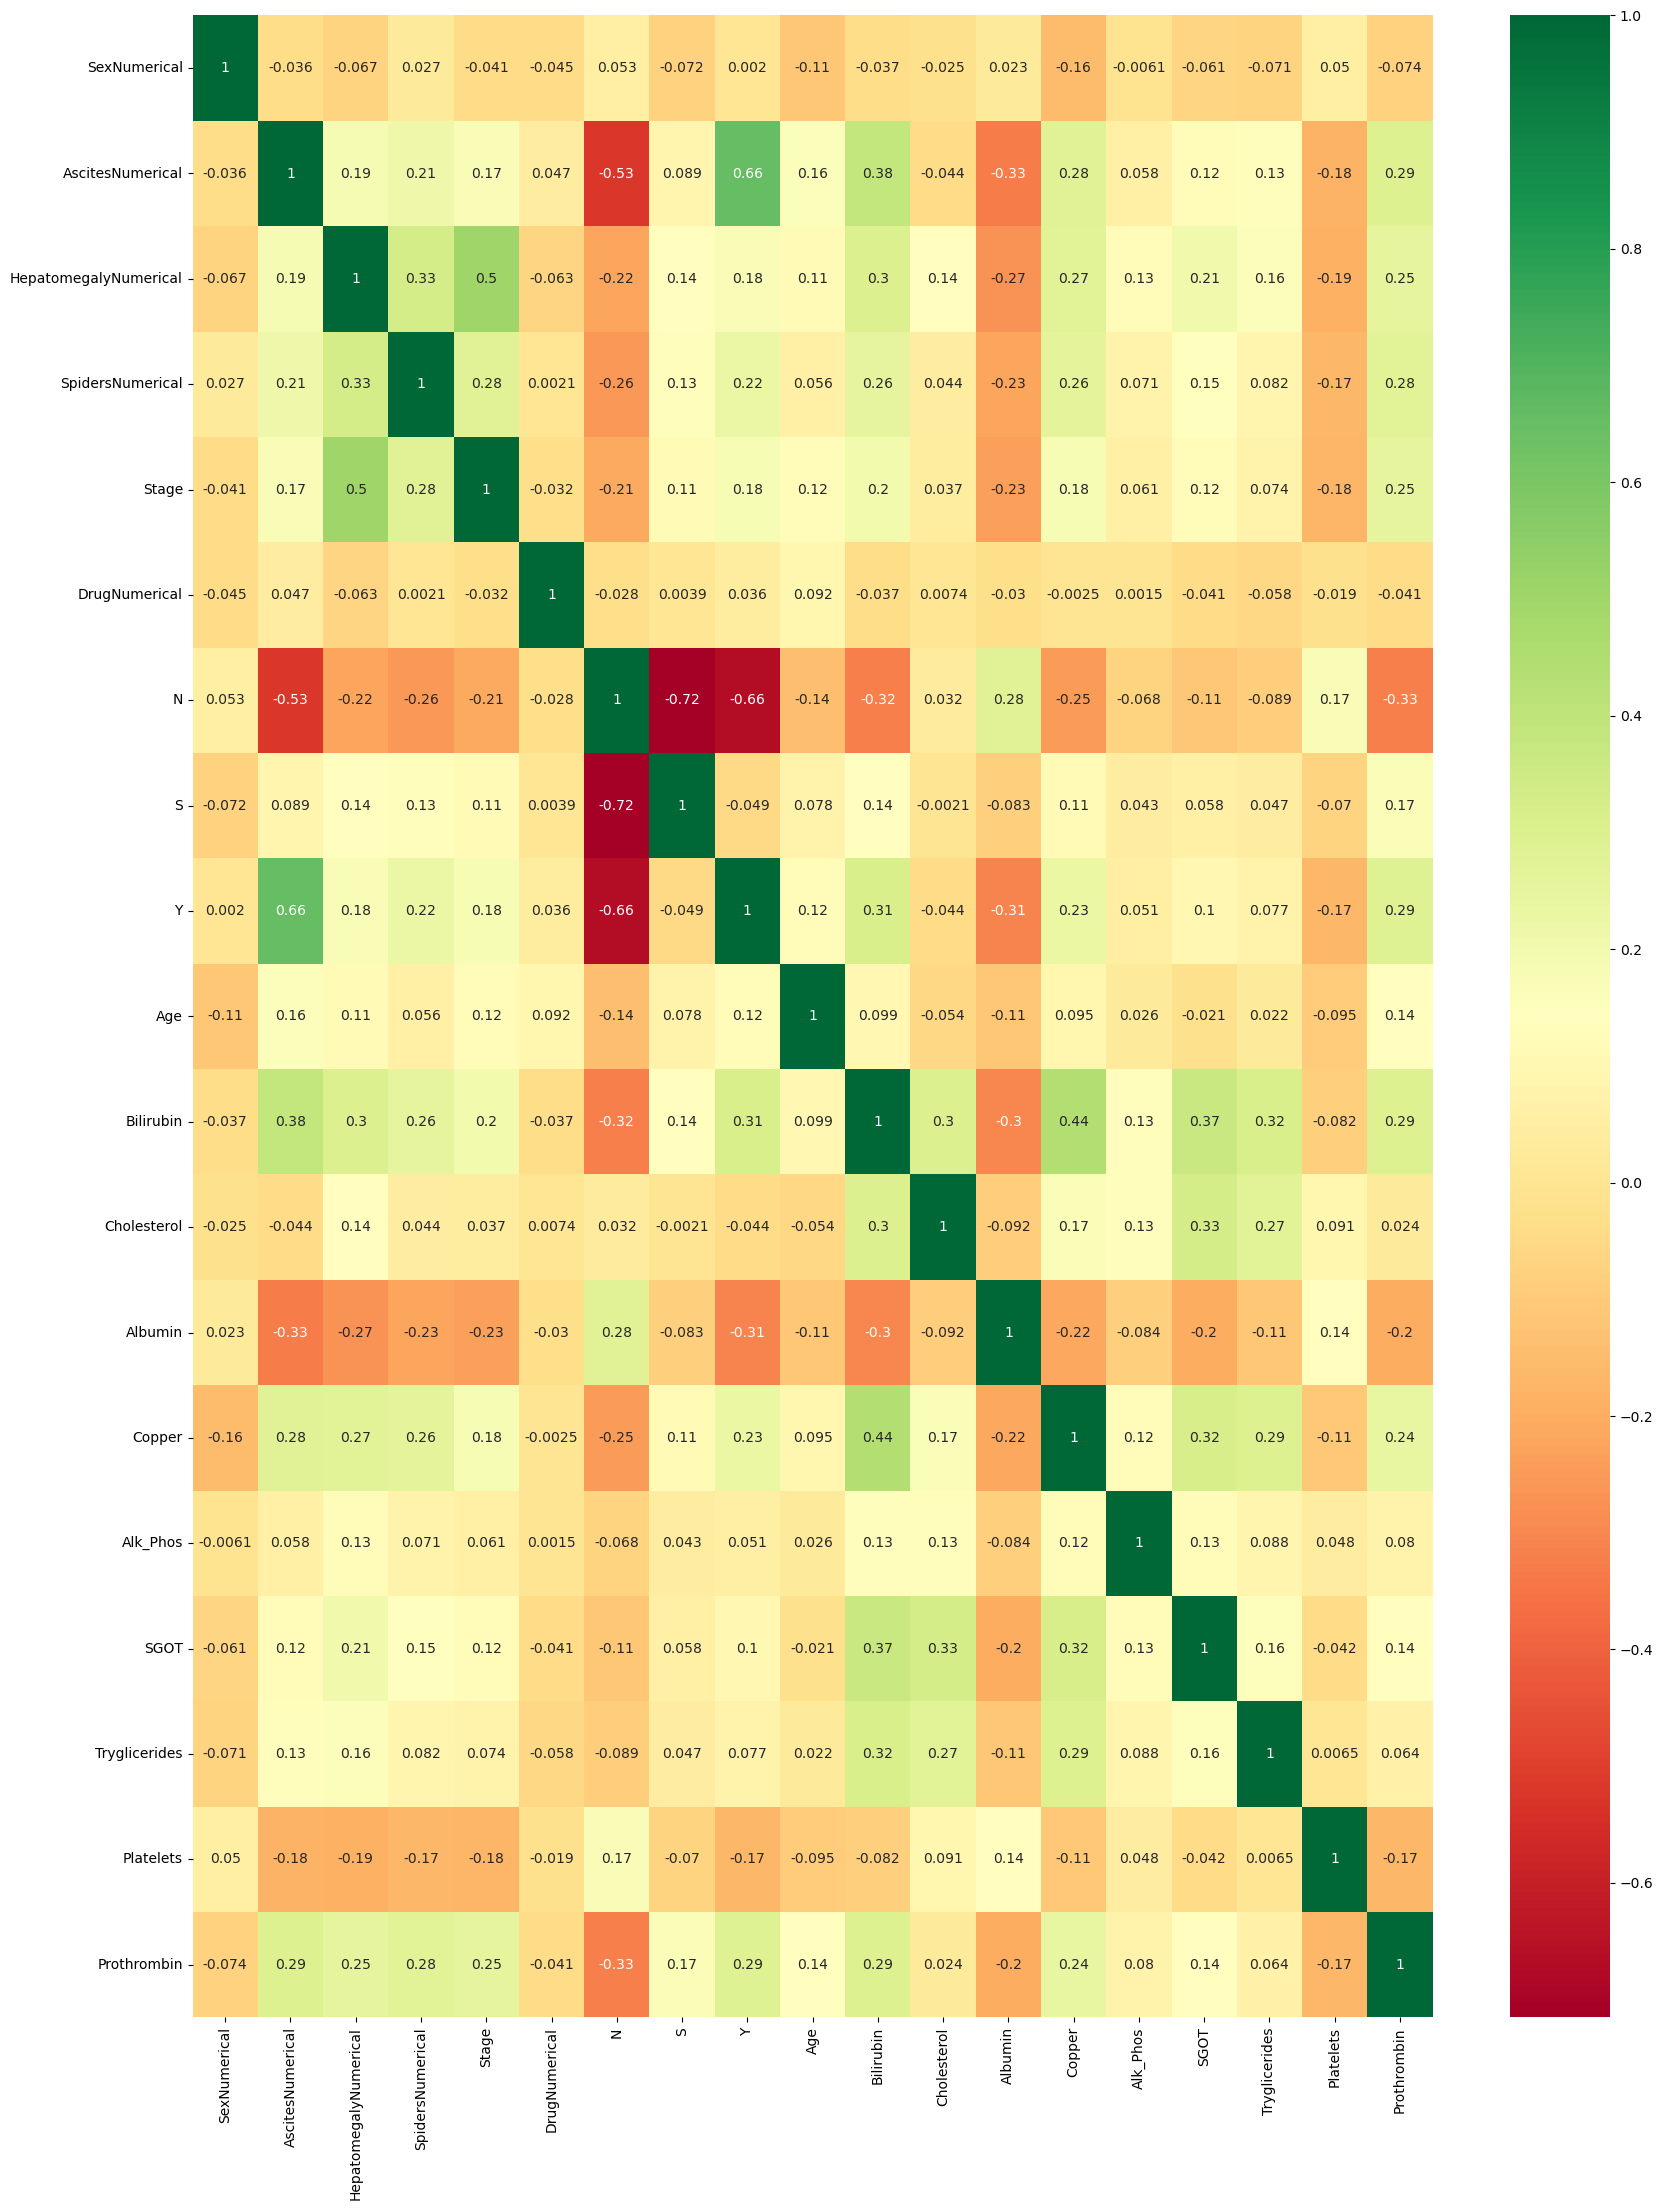

In [27]:
plt.figure(figsize=(20,26))
sns.heatmap(all_train_data.corr(), annot=True, cmap="RdYlGn")

* strong negative correlation between N catagory of edema ascites (-0.53)
* strong positive correlation between Y catagory of edema and ascites (0.66)
* strong positive correlation between stage and hepatomegaly (0.5)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\baris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 5000x5000 with 0 Axes>

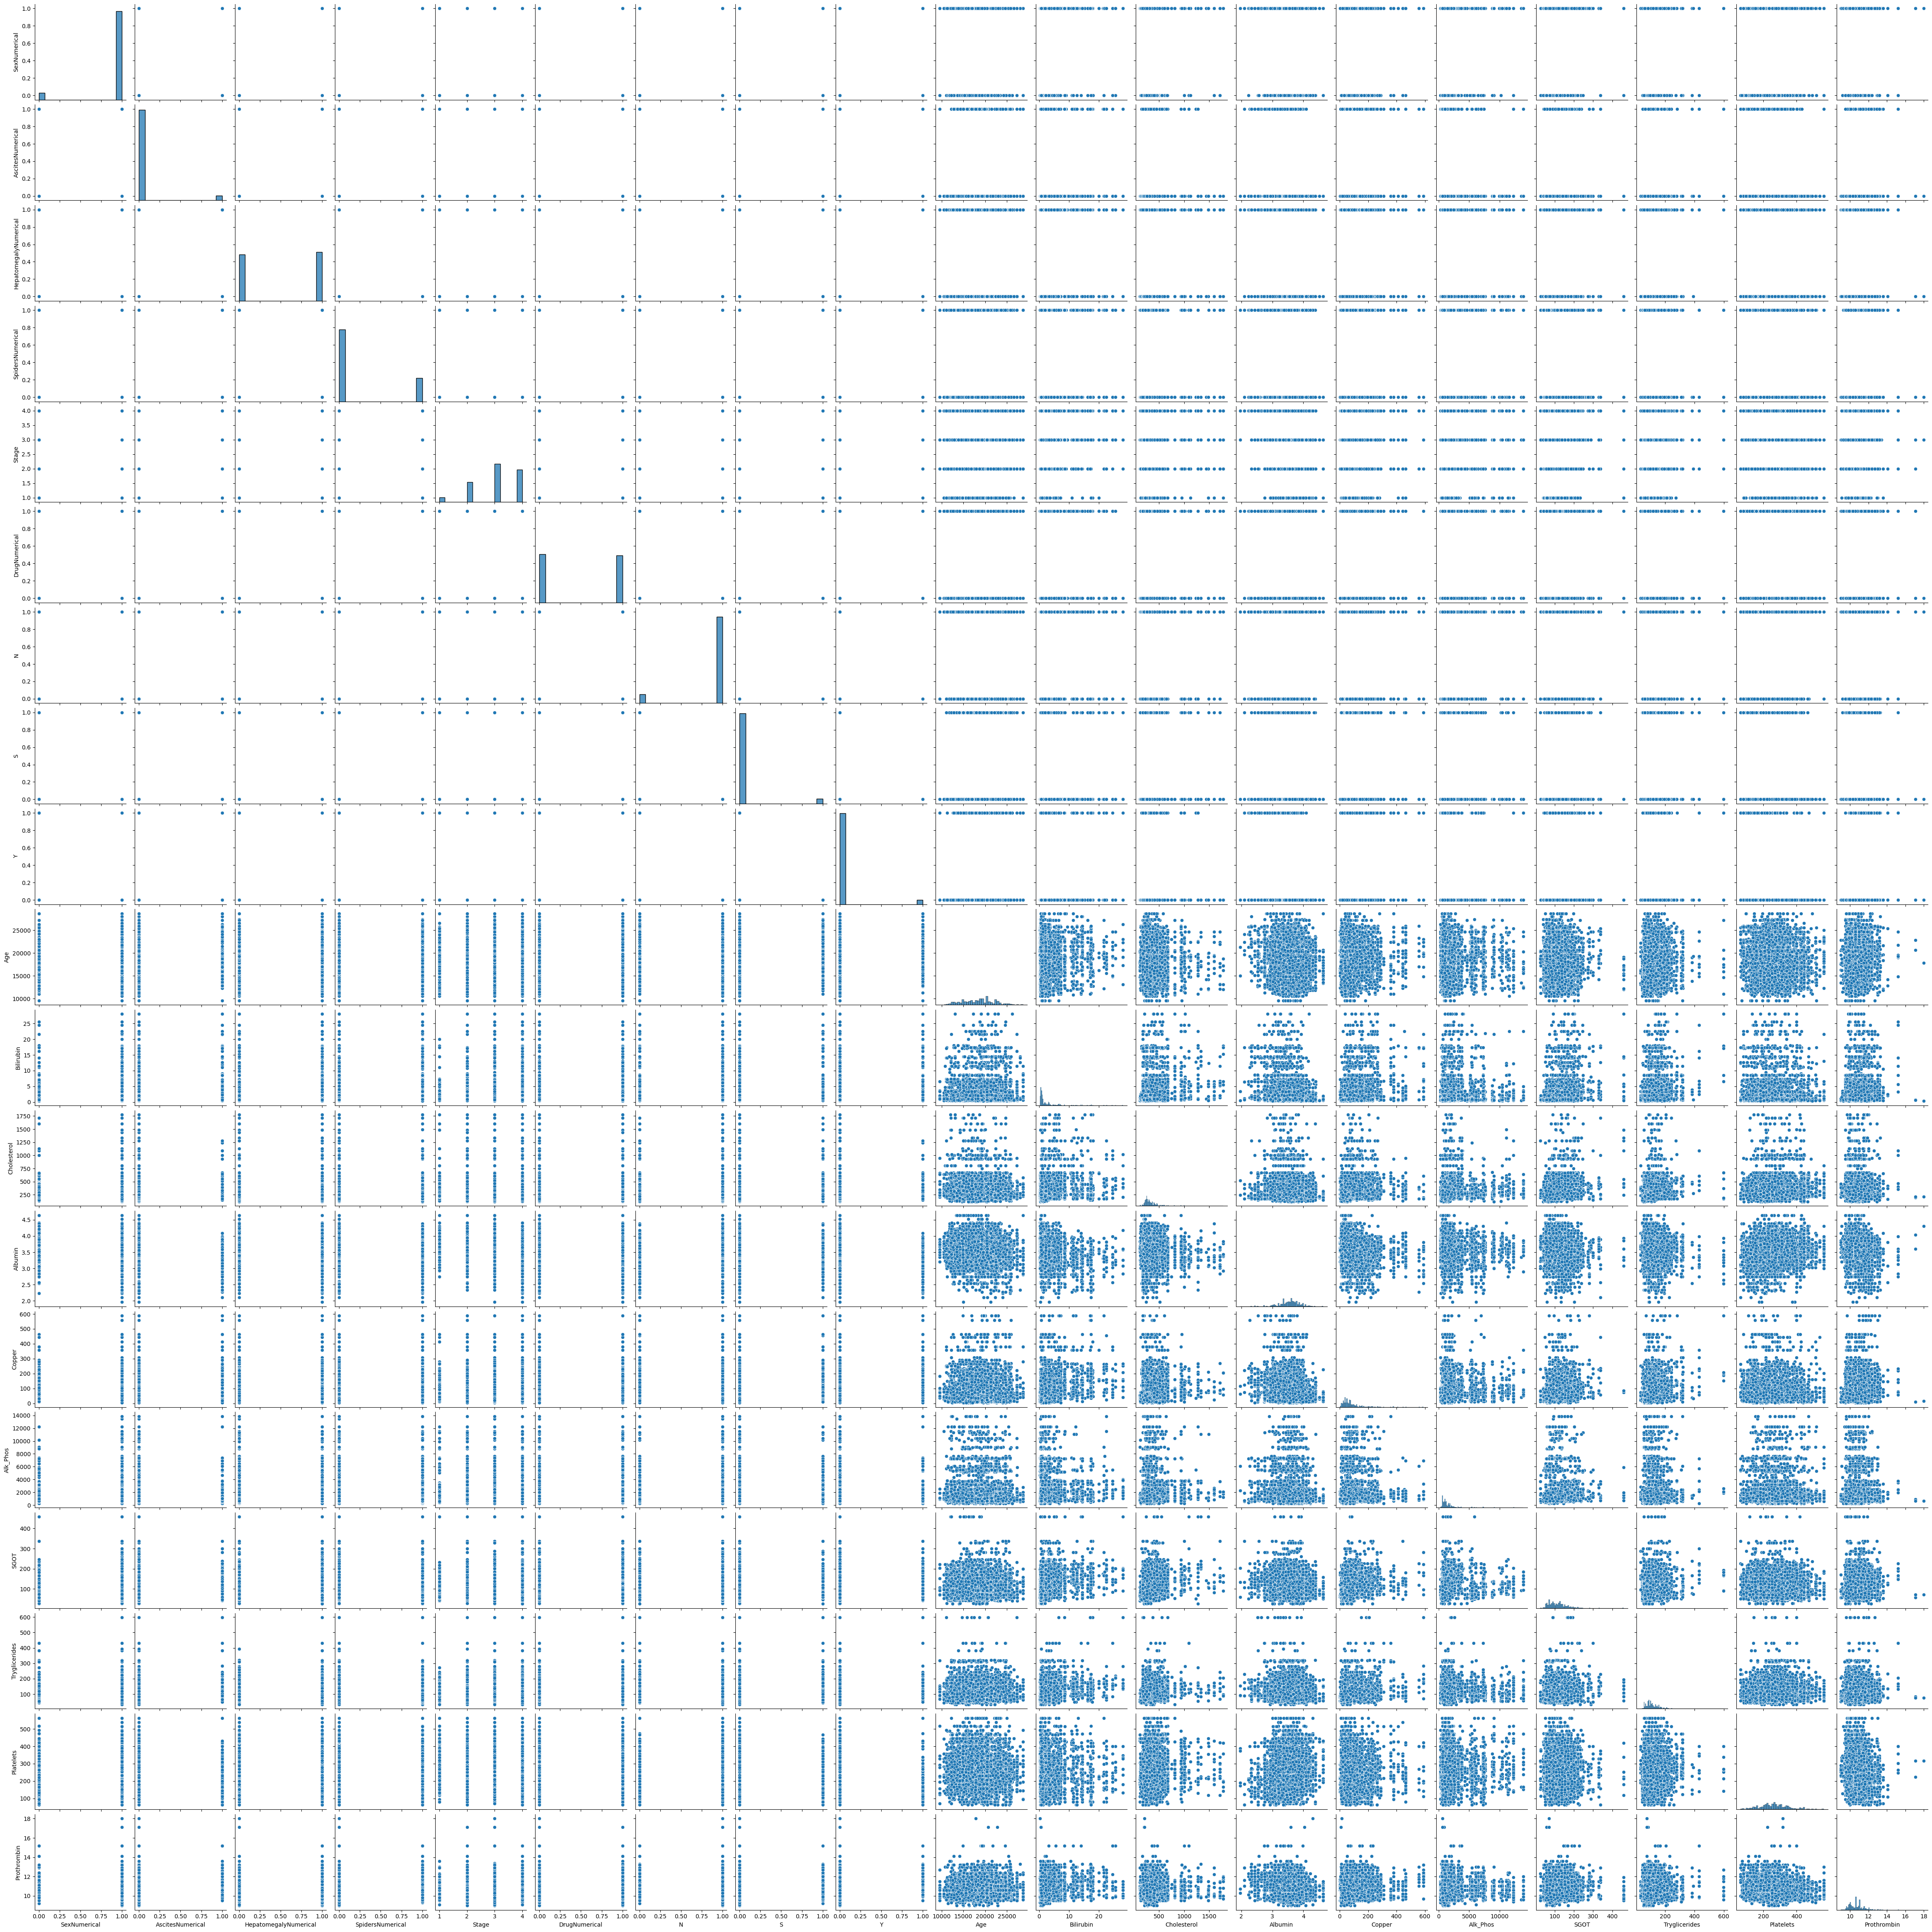

In [28]:
plt.figure(figsize=(50,50))
sns.pairplot(all_train_data)

#### Result: no significant non linear relationships were found 

# II. Imputation Methods

In [29]:
#Split and stratify the data to train and validation sets
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('train.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

## Manual Preprocessing

In [30]:
train.Drug.replace(("Placebo", "D-penicillamine"), (0,1), inplace = True)
train.Sex.replace(("F", "M"), (0,1), inplace = True)
train.Ascites.replace(("N", "Y"), (0,1), inplace = True)
train.Hepatomegaly.replace(("N", "Y"), (0,1), inplace = True)
train.Spiders.replace(("N", "Y"), (0,1), inplace = True)
# train.Edema.replace(("N", "Y", "S"), (0,1,2), inplace = True)

In [31]:
#one hot encode the status and edema

In [32]:
status_dummies = pd.get_dummies(train.Status)
edema_dummies = pd.get_dummies(train.Edema)
train = pd.concat([train, edema_dummies, status_dummies], axis=1)

In [33]:
train.head()

id  N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders Edema  \
2851  2851     769     1  19060    0        0             1        0     N   
7691  7691    2898     1  22265    0        0             1        0     N   
1170  1170    2772     0  18176    0        0             1        1     N   
4255  4255    4556     1  17850    0        0             0        0     N   
4472  4472    2365     1  16300    0        0             0        0     N   

      Bilirubin  ...  Platelets  Prothrombin  Stage  Status     N      S  \
2851        2.9  ...      277.0         11.0    4.0       D  True  False   
7691        1.1  ...      190.0          9.9    4.0       C  True  False   
1170        1.6  ...      195.0          9.7    4.0       D  True  False   
4255        1.1  ...      203.0         10.6    2.0       C  True  False   
4472        0.6  ...      203.0         10.1    1.0       C  True  False   

          Y      C     CL      D  
2851  False  False  False   True  
7691  False   True  False  False  
1170  False  False  False   True  
4255  False   True  False  False  
4472  False   True  False  False  

[5 rows x 26 columns]

In [34]:
train.N.replace((False,True), (0,1), inplace = True)
train.S.replace((False,True), (0,1), inplace = True)
train.Y.replace((False,True), (0,1), inplace = True)
train.C.replace((False,True), (0,1), inplace = True)
train.CL.replace((False,True), (0,1), inplace = True)
train.D.replace((False,True), (0,1), inplace = True)

In [35]:
train = train.drop("Edema",axis = 1)
train = train.drop("Status",axis = 1)

In [36]:
train.head()

id  N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  \
2851  2851     769     1  19060    0        0             1        0   
7691  7691    2898     1  22265    0        0             1        0   
1170  1170    2772     0  18176    0        0             1        1   
4255  4255    4556     1  17850    0        0             0        0   
4472  4472    2365     1  16300    0        0             0        0   

      Bilirubin  Cholesterol  ...  Tryglicerides  Platelets  Prothrombin  \
2851        2.9        332.0  ...          103.0      277.0         11.0   
7691        1.1        201.0  ...          146.0      190.0          9.9   
1170        1.6        302.0  ...           63.0      195.0          9.7   
4255        1.1        361.0  ...           84.0      203.0         10.6   
4472        0.6        266.0  ...          102.0      203.0         10.1   

      Stage  N  S  Y  C  CL  D  
2851    4.0  1  0  0  0   0  1  
7691    4.0  1  0  0  1   0  0  
1170    4.0  1  0  0  0   0  1  
4255    2.0  1  0  0  1   0  0  
4472    1.0  1  0  0  1   0  0  

[5 rows x 24 columns]

In [37]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [38]:
features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [39]:
#Scaling numerical features using FunctionTransformer
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
train[features_to_scale] = transformer.transform(train[features_to_scale])

## Deleting and Imputing

In [40]:
#This function randomly deletes attributes except the column of ID
def make_random_nans(df, percent_rows, percent_columns):
    
    #make copy of dataframe so that the original is not modified
    dfc = df.copy()
    
    num_rows_to_nan = int(percent_rows * len(dfc))
    num_columns_to_nan = int(percent_columns * len(dfc.columns))
    
    #exclude ID
    a = list(dfc.columns)
    b = a[1:]
    
    #pick randown rows choose column from
    rows_to_nan = np.random.choice(dfc.index, num_rows_to_nan, replace=False)
    
    for row in rows_to_nan:
        #pick random columns
        columns_to_nan = np.random.choice(b, num_columns_to_nan, replace=False)
        dfc.loc[row, columns_to_nan] = np.nan
    
    return dfc
    

## KNN imputation

In [41]:
from sklearn.impute import KNNImputer

In [42]:
#make a copy of train dataset
train_copy = train.copy()

In [43]:
#delete random data from the dataset train1
train_deleted = make_random_nans(train_copy,0.1,0.1)

In [44]:
#Checking train_deleted's non-null values
train_deleted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 2851 to 6501
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   int64  
 1   N_Days         6277 non-null   float64
 2   Drug           6269 non-null   float64
 3   Age            6258 non-null   float64
 4   Sex            6261 non-null   float64
 5   Ascites        6277 non-null   float64
 6   Hepatomegaly   6269 non-null   float64
 7   Spiders        6272 non-null   float64
 8   Bilirubin      6270 non-null   float64
 9   Cholesterol    6257 non-null   float64
 10  Albumin        6277 non-null   float64
 11  Copper         6281 non-null   float64
 12  Alk_Phos       6266 non-null   float64
 13  SGOT           6279 non-null   float64
 14  Tryglicerides  6272 non-null   float64
 15  Platelets      6270 non-null   float64
 16  Prothrombin    6269 non-null   float64
 17  Stage          6286 non-null   float64
 18  N         

In [45]:
# Initialise the KNNImputer
imputer1 = KNNImputer(n_neighbors=15)

In [46]:
# Fit on the dataset and transform it to impute missing values
KNN_imputed_data = imputer1.fit_transform(train_deleted)

In [47]:
# Convert the imputed data back to a pandas DataFrame
KNN_imputed_df = pd.DataFrame(KNN_imputed_data, columns=train.columns)

In [48]:
# Check no values are missing
NaN_count = KNN_imputed_df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [49]:
KNN_imputed_df.head()

id    N_Days      Drug        Age  Sex  Ascites  Hepatomegaly  Spiders  \
0  2851.0  6.646391  1.000000   9.855400  0.0      0.0           1.0      0.0   
1  7691.0  7.972121  1.000000  10.010816  0.0      0.0           1.0      0.0   
2  1170.0  7.927685  0.466667   9.760001  0.0      0.0           1.0      1.0   
3  4255.0  8.424420  1.000000   9.789815  0.0      0.0           0.0      0.0   
4  4472.0  7.768956  1.000000   9.698982  0.0      0.0           0.0      0.0   

   Bilirubin  Cholesterol  ...  Tryglicerides  Platelets  Prothrombin  \
0   1.360977     5.808142  ...       4.644391   5.627621     2.484907   
1   0.741937     5.308268  ...       4.990433   5.252273     2.388763   
2   0.955511     5.713733  ...       4.158883   5.278115     2.370244   
3   0.741937     5.891644  ...       4.442651   5.318120     2.451005   
4   0.470004     5.587249  ...       4.634729   5.318120     2.406945   

      Stage    N    S    Y    C   CL    D  
0  1.609438  1.0  0.0  0.0  0.0  0.0  1.0  
1  1.609438  1.0  0.0  0.0  1.0  0.0  0.0  
2  1.609438  1.0  0.0  0.0  0.0  0.0  1.0  
3  1.098612  1.0  0.0  0.0  1.0  0.0  0.0  
4  0.693147  1.0  0.0  0.0  1.0  0.0  0.0  

[5 rows x 24 columns]

In [50]:
# measuring the MSE between the original and imputed dataframes
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(train.values, KNN_imputed_df.values)
print(f"Mean Squared Error for KNN imputation is : {mse1}")

Mean Squared Error for KNN imputation is : 0.0015284475768990345


## Median Imputation

In [51]:
from sklearn.impute import SimpleImputer

In [52]:
#Initialise the Simple Imputer with the median strategy
imputer2 = SimpleImputer(missing_values=np.nan, strategy='median')

In [53]:
#Fit on dataset and transform it to impute the missing value
Median_imputed_dataset = imputer2.fit_transform(train_deleted)

In [54]:
# Convert the imputed data back to a pandas DataFrame
Median_imputed_df = pd.DataFrame(Median_imputed_dataset, columns=train.columns)

In [55]:
# Check no values are missing
NaN_count = Median_imputed_df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [56]:
Median_imputed_df.head()

id    N_Days  Drug        Age  Sex  Ascites  Hepatomegaly  Spiders  \
0  2851.0  6.646391   1.0   9.855400  0.0      0.0           1.0      0.0   
1  7691.0  7.972121   1.0  10.010816  0.0      0.0           1.0      0.0   
2  1170.0  7.927685   0.0   9.825526  0.0      0.0           1.0      1.0   
3  4255.0  8.424420   1.0   9.789815  0.0      0.0           0.0      0.0   
4  4472.0  7.768956   1.0   9.698982  0.0      0.0           0.0      0.0   

   Bilirubin  Cholesterol  ...  Tryglicerides  Platelets  Prothrombin  \
0   1.360977     5.808142  ...       4.644391   5.627621     2.484907   
1   0.741937     5.308268  ...       4.990433   5.252273     2.388763   
2   0.955511     5.713733  ...       4.158883   5.278115     2.370244   
3   0.741937     5.891644  ...       4.442651   5.318120     2.451005   
4   0.470004     5.587249  ...       4.634729   5.318120     2.406945   

      Stage    N    S    Y    C   CL    D  
0  1.609438  1.0  0.0  0.0  0.0  0.0  1.0  
1  1.609438  1.0  0.0  0.0  1.0  0.0  0.0  
2  1.609438  1.0  0.0  0.0  0.0  0.0  1.0  
3  1.098612  1.0  0.0  0.0  1.0  0.0  0.0  
4  0.693147  1.0  0.0  0.0  1.0  0.0  0.0  

[5 rows x 24 columns]

In [57]:
# measuring the MSE between the original and imputed dataframes
mse2 = mean_squared_error(train.values, Median_imputed_df.values)
print(f"Mean Squared Error for Median Imputation is : {mse2}")

Mean Squared Error for Median Imputation is : 0.0017724450388424539


## MICE (Multiple Imputation by Chained Equation) Imputation

In [58]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [59]:
imputer3 = IterativeImputer(random_state=100, max_iter=10)

In [60]:
mice_imputed_data = imputer3.fit_transform(train_deleted)

In [61]:
mice_imputed_df = pd.DataFrame(mice_imputed_data, columns=train.columns)

In [62]:
mice_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   float64
 1   N_Days         6324 non-null   float64
 2   Drug           6324 non-null   float64
 3   Age            6324 non-null   float64
 4   Sex            6324 non-null   float64
 5   Ascites        6324 non-null   float64
 6   Hepatomegaly   6324 non-null   float64
 7   Spiders        6324 non-null   float64
 8   Bilirubin      6324 non-null   float64
 9   Cholesterol    6324 non-null   float64
 10  Albumin        6324 non-null   float64
 11  Copper         6324 non-null   float64
 12  Alk_Phos       6324 non-null   float64
 13  SGOT           6324 non-null   float64
 14  Tryglicerides  6324 non-null   float64
 15  Platelets      6324 non-null   float64
 16  Prothrombin    6324 non-null   float64
 17  Stage          6324 non-null   float64
 18  N       

In [63]:
# measuring the MSE between the original and imputed dataframes 
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(train.values, mice_imputed_df.values)
print(f"Mean Squared Error: {mse3}")

Mean Squared Error: 0.0009634927359052427


In [64]:
print("Results of MSEs are:")
print("KKN :", mse1)
print("Median :", mse2)
print("MICE :", mse3)

Results of MSEs are:
KKN : 0.0015284475768990345
Median : 0.0017724450388424539
MICE : 0.0009634927359052427


## Repeating the Process Above to Get Average MSEs

In [65]:
def repeated_tests(df, percent_rows, percent_columns):

    mses1 = []
    mses2 = []
    mses3 = []
    
    imputer1 = KNNImputer(n_neighbors=15)
    imputer2 = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer3 = IterativeImputer(random_state=100, max_iter=10)
    
    for i in range(10):
        train_deleted = make_random_nans(df, 0.1, 0.1)

        KNN_imputed_data = imputer1.fit_transform(train_deleted)
        KNN_imputed_df = pd.DataFrame(KNN_imputed_data, columns=train.columns)
        mse1 = mean_squared_error(df.values, KNN_imputed_df.values)
        
        
        Median_imputed_dataset = imputer2.fit_transform(train_deleted)
        Median_imputed_df = pd.DataFrame(Median_imputed_dataset, columns=train.columns)
        mse2 = mean_squared_error(df.values, Median_imputed_df.values)
        
        
        mice_imputed_dataset = imputer3.fit_transform(train_deleted)
        mice_imputed_df = pd.DataFrame(mice_imputed_dataset, columns=train.columns)
        mse3 = mean_squared_error(df.values, mice_imputed_df.values)
        
        mses1.append(mse1)
        mses2.append(mse2)
        mses3.append(mse3)
        
    return mses1,mses2,mses3

In [66]:
results = repeated_tests(train, 0.1, 0.1)

In [67]:
print("Average MSE for KKN, Median, MICE in order:")
for result in results:
    print(sum(result)/len(result))

Average MSE for KKN, Median, MICE in order:
0.001619036090922695
0.0018614878566407505
0.0009356352859098101


Repeating Test 10 times we have MICE as best performing imputation method

## Comparing the Imputation methods using XGBoost!

### Pipeline (for this Imputation section)

In [68]:
##Pipeline Codes

numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]
categorical_bin_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders"]
categorical_oh_values = ["Edema"]

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder

# numeric pipeline
num_pipeline = Pipeline([('func_transformer', FunctionTransformer(np.log1p)), 
                         ('minmax_scaler', MinMaxScaler()), ])




from sklearn.base import BaseEstimator, TransformerMixin 
class BinaryEncoder (BaseEstimator, TransformerMixin):
    def __init__ (self, features):
        self.features = features
    def fit(self, X, y=None): 
        return self # do nothing
    def transform(self, X):
        for c in self.features:
            values = X[c].unique()
            X[c].replace(values,(0,1), inplace=True)
        return X

    
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

def label_encode(column):
    label_encoder = LabelEncoder()
    encoded_column = label_encoder.fit_transform(column)
    return encoded_column.reshape(-1, 1)


# full pipeline (numeric & categorical)
full_pipeline = ColumnTransformer([ ("num", num_pipeline, numeric_values), 
                                   ("bin_cat", BinaryEncoder(categorical_bin_values), categorical_bin_values), 
                                   ("cat", OneHotEncoder(sparse_output=False), categorical_oh_values),
                                  ]) 


In [69]:
#because we are using different pipeline we restart training and validation set
train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

#fit transform the train dataset with pipeline above
transformed_train = full_pipeline.fit_transform(train)
transformed_train_df = pd.DataFrame(transformed_train)

#fit transform validation dataset
transformed_valid = full_pipeline.fit_transform(validation)
transformed_valid_df = pd.DataFrame(transformed_valid)



In [70]:
# Making 10% of random attributes NaN in 10% of random rows
transformed_train_deleted = make_random_nans(transformed_train_df,0.1,0.1)

### Imputing Deleted Data With 3 Methods

In [71]:
KNN_imputed_dataset = imputer1.fit_transform(transformed_train_deleted)

KNN_imputed_df = pd.DataFrame(KNN_imputed_dataset)

In [72]:
Median_imputed_dataset = imputer2.fit_transform(transformed_train_deleted)

Median_imputed_df = pd.DataFrame(Median_imputed_dataset)

In [73]:
mice_imputed_dataset = imputer3.fit_transform(transformed_train_deleted)

mice_imputed_df = pd.DataFrame(mice_imputed_dataset)

### Fitting XGBoost Into Datasets Imputed by Different Methods

In [74]:
from sklearn.metrics import roc_curve, auc, log_loss
from xgboost import XGBClassifier

In [75]:
xgbClassificationModel = XGBClassifier()

#### For KNN

In [76]:
xgbClassificationModelForKNN = XGBClassifier(objective='multi:softprob')

In [77]:
KNN_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6324 non-null   float64
 1   1       6324 non-null   float64
 2   2       6324 non-null   float64
 3   3       6324 non-null   float64
 4   4       6324 non-null   float64
 5   5       6324 non-null   float64
 6   6       6324 non-null   float64
 7   7       6324 non-null   float64
 8   8       6324 non-null   float64
 9   9       6324 non-null   float64
 10  10      6324 non-null   float64
 11  11      6324 non-null   float64
 12  12      6324 non-null   float64
 13  13      6324 non-null   float64
 14  14      6324 non-null   float64
 15  15      6324 non-null   float64
 16  16      6324 non-null   float64
 17  17      6324 non-null   float64
 18  18      6324 non-null   float64
 19  19      6324 non-null   float64
dtypes: float64(20)
memory usage: 988.3 KB


In [78]:
#We convert KNN_imputed_df back into a form suitable for model fitting
X_train_KNN = KNN_imputed_dataset

y_train = label_encoder.fit_transform(train["Status"])


#Similarly to validation dataset
X_valid = transformed_valid

y_valid = label_encoder.fit_transform(validation["Status"])


In [79]:
xgbClassificationModelForKNN.fit(X_train_KNN, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [80]:
trainscore =  xgbClassificationModelForKNN.score(X_train_KNN, y_train)
testscore =  xgbClassificationModelForKNN.score(X_valid, y_valid)

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

test score: 0.8089816571790006 train score: 0.9969955724225174 



In [81]:
y_pred =  xgbClassificationModelForKNN.predict(X_valid)
y_pred_prob = xgbClassificationModelForKNN.predict_proba(X_valid)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#roc_auc = auc(fpr, tpr)
#one for log loss
loss = log_loss(y_valid, y_pred_prob)
loss

0.5221463521260847

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

cm=confusion_matrix(y_valid, y_pred)

print(' f1 score: ',f1_score(y_valid, y_pred, average='weighted'),'\n')
print(' precision score: ',precision_score(y_valid, y_pred, average='weighted'),'\n')
print(' recall score: ',recall_score(y_valid, y_pred, average='weighted'),'\n')

print(classification_report(y_valid, y_pred))

 f1 score:  0.8040165752441916 

 precision score:  0.8107431643071061 

 recall score:  0.8089816571790006 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       993
           1       0.67      0.18      0.29        55
           2       0.71      0.80      0.75       533

    accuracy                           0.81      1581
   macro avg       0.75      0.61      0.63      1581
weighted avg       0.81      0.81      0.80      1581



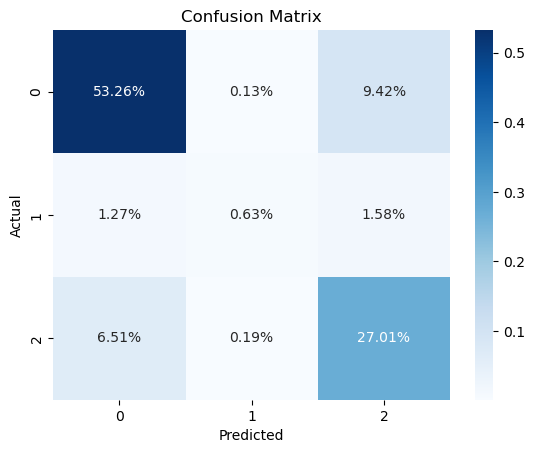

In [83]:
import seaborn as sns

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [84]:
#### For Median

#### For Median

In [85]:
xgbClassificationModelForMedian = XGBClassifier(objective='multi:softprob')

In [86]:
Median_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6324 non-null   float64
 1   1       6324 non-null   float64
 2   2       6324 non-null   float64
 3   3       6324 non-null   float64
 4   4       6324 non-null   float64
 5   5       6324 non-null   float64
 6   6       6324 non-null   float64
 7   7       6324 non-null   float64
 8   8       6324 non-null   float64
 9   9       6324 non-null   float64
 10  10      6324 non-null   float64
 11  11      6324 non-null   float64
 12  12      6324 non-null   float64
 13  13      6324 non-null   float64
 14  14      6324 non-null   float64
 15  15      6324 non-null   float64
 16  16      6324 non-null   float64
 17  17      6324 non-null   float64
 18  18      6324 non-null   float64
 19  19      6324 non-null   float64
dtypes: float64(20)
memory usage: 988.3 KB


In [87]:
X_train_Median = Median_imputed_dataset

In [88]:
xgbClassificationModelForMedian.fit(X_train_Median, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [89]:
trainscore =  xgbClassificationModelForMedian.score(X_train_Median,y_train)
testscore =  xgbClassificationModelForMedian.score(X_valid, y_valid)

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

test score: 0.8083491461100569 train score: 0.9969955724225174 



In [90]:
y_pred =  xgbClassificationModelForMedian.predict(X_valid)
y_pred_prob = xgbClassificationModelForMedian.predict_proba(X_valid)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#roc_auc = auc(fpr, tpr)
#one for log loss
loss = log_loss(y_valid, y_pred_prob)
loss

0.5178701136625168

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

cm=confusion_matrix(y_valid, y_pred)

print(' f1 score: ',f1_score(y_valid, y_pred, average='weighted'),'\n')
print(' precision score: ',precision_score(y_valid, y_pred, average='weighted'),'\n')
print(' recall score: ',recall_score(y_valid, y_pred, average='weighted'),'\n')

print(classification_report(y_valid, y_pred))

 f1 score:  0.8028699780220419 

 precision score:  0.8131278916318967 

 recall score:  0.8083491461100569 

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       993
           1       0.75      0.16      0.27        55
           2       0.71      0.81      0.75       533

    accuracy                           0.81      1581
   macro avg       0.78      0.61      0.63      1581
weighted avg       0.81      0.81      0.80      1581



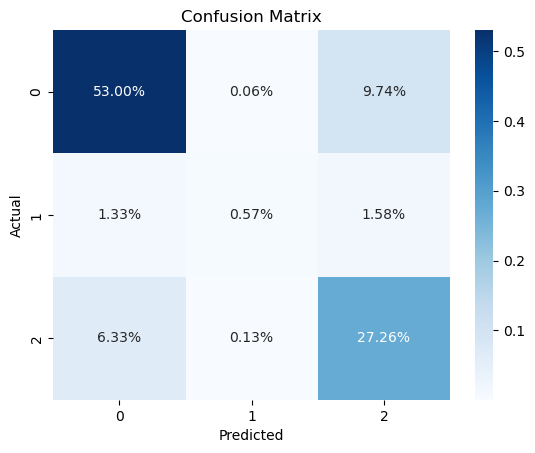

In [92]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### For MICE

In [93]:
xgbClassificationModelForMICE = XGBClassifier(n_estimators=100, num_class=3)

In [94]:
mice_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6324 non-null   float64
 1   1       6324 non-null   float64
 2   2       6324 non-null   float64
 3   3       6324 non-null   float64
 4   4       6324 non-null   float64
 5   5       6324 non-null   float64
 6   6       6324 non-null   float64
 7   7       6324 non-null   float64
 8   8       6324 non-null   float64
 9   9       6324 non-null   float64
 10  10      6324 non-null   float64
 11  11      6324 non-null   float64
 12  12      6324 non-null   float64
 13  13      6324 non-null   float64
 14  14      6324 non-null   float64
 15  15      6324 non-null   float64
 16  16      6324 non-null   float64
 17  17      6324 non-null   float64
 18  18      6324 non-null   float64
 19  19      6324 non-null   float64
dtypes: float64(20)
memory usage: 988.3 KB


In [95]:
X_train_mice = mice_imputed_dataset

In [96]:
xgbClassificationModelForMICE.fit(X_train_mice, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [97]:
trainscore =  xgbClassificationModelForMICE.score(X_train_mice, y_train)
testscore =  xgbClassificationModelForMICE.score(X_valid,y_valid)

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

test score: 0.7988614800759013 train score: 0.9971537001897534 



In [98]:
y_pred = xgbClassificationModelForMICE.predict(X_valid)
y_pred_prob = xgbClassificationModelForMICE.predict_proba(X_valid)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#roc_auc = auc(fpr, tpr)
#one for log loss
y_pred_prob_reshaped = y_pred_prob[:, :3]
loss = log_loss(y_valid, y_pred_prob_reshaped)
loss

0.513090587722185

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

cm=confusion_matrix(y_valid, y_pred)

print(' f1 score: ',f1_score(y_valid, y_pred, average='weighted'),'\n')
print(' precision score: ',precision_score(y_valid, y_pred, average='weighted'),'\n')
print(' recall score: ',recall_score(y_valid, y_pred, average='weighted'),'\n')

print(classification_report(y_valid, y_pred))

 f1 score:  0.7942978841311011 

 precision score:  0.799185369897012 

 recall score:  0.7988614800759013 

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       993
           1       0.59      0.18      0.28        55
           2       0.70      0.79      0.74       533

    accuracy                           0.80      1581
   macro avg       0.72      0.60      0.62      1581
weighted avg       0.80      0.80      0.79      1581



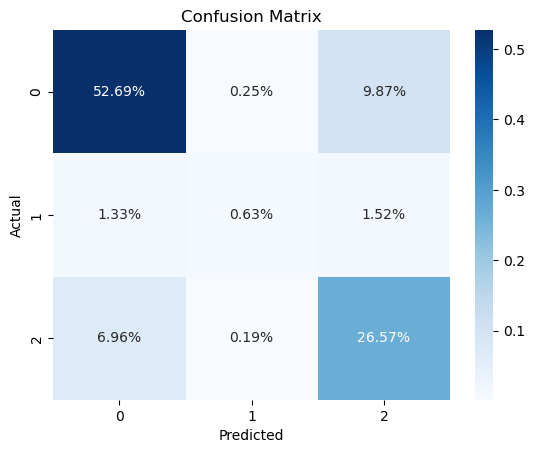

In [100]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# III. Class Imbalance Techniques (SMOTE and Class Weights Adjustment)

### Straitfied 80/20 Split into Train/Validation datasets
Stratified split, choosing 20% of each class to construct the validation set, in order to maintain the initial class distributions into both the Train and Validation datasets.

In [101]:
# Splitting data 80/20 with stratification to maintain the class proportions
# The style for sklearn imports is to import specific functions from the documentation
from sklearn.model_selection import train_test_split

# Split full_data into `X` (just the features) and `y` (just the target variable `Status`)
X = df.drop('Status', axis=1)
y = df['Status']

# Stratified split of data while maintaining the distribution of the 'Status' classes
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Verify stratification by comparing class distributions in the full dataset and splits
distribution_full = y.value_counts(normalize=True)
distribution_train = y_train.value_counts(normalize=True)
distribution_val = y_val.value_counts(normalize=True)

## Pipeline for Class Imbalance and Model Fittings

In [102]:
#! Pre-processing (StandardScaler)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical features
categorical_features = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
numerical_features = X_train.columns.difference(categorical_features + ['id']) # Exclude 'id' from features

# Create a column transformer to apply different preprocessing to categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])



# Fit a preprocessor to the training data, and Transform training set too
X_train_processed = preprocessor.fit_transform(X_train)
# Transform validation set (but do not fit the validation set!)
X_val_processed = preprocessor.transform(X_val)

# Convert processed data back to DataFrame for better readability (optional step)
X_train_processed_df = pd.DataFrame(X_train_processed, columns = preprocessor.get_feature_names_out())
X_val_processed_df = pd.DataFrame(X_val_processed, columns = preprocessor.get_feature_names_out())

# Inspect the processed data
X_train_processed_df.head()

num__Age  num__Albumin  num__Alk_Phos  num__Bilirubin  num__Cholesterol  \
0  2.786334      0.735312      -0.437535        1.212277         -0.552543   
1  0.281587      0.618653      -0.423642       -0.150199         -0.609257   
2  0.795451      0.443664      -0.193355       -0.176914          0.566258   
3  1.144781     -1.510372      -0.326932        2.681614          0.117706   
4 -0.753434      0.939465      -0.066723       -0.444067          1.174638   

   num__Copper  num__N_Days  num__Platelets  num__Prothrombin  num__SGOT  ...  \
0     3.906874    -0.246369       -1.943384          0.480320   0.914594  ...   
1    -0.443949    -0.077250       -0.398753         -0.929690  -0.315621  ...   
2    -0.193447     0.572859       -0.122103         -0.929690   0.578321  ...   
3     0.742639    -1.654788       -0.871364          1.121234   0.687975  ...   
4    -0.087973     0.199160        0.062331         -1.186055   0.040494  ...   

   cat__Sex_M  cat__Ascites_N  cat__Ascites_Y  cat__Hepatomegaly_N  \
0         1.0             0.0             1.0                  0.0   
1         0.0             1.0             0.0                  0.0   
2         0.0             1.0             0.0                  1.0   
3         0.0             1.0             0.0                  0.0   
4         0.0             1.0             0.0                  1.0   

   cat__Hepatomegaly_Y  cat__Spiders_N  cat__Spiders_Y  cat__Edema_N  \
0                  1.0             0.0             1.0           1.0   
1                  1.0             1.0             0.0           1.0   
2                  0.0             1.0             0.0           1.0   
3                  1.0             0.0             1.0           0.0   
4                  0.0             1.0             0.0           1.0   

   cat__Edema_S  cat__Edema_Y  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           1.0  
4           0.0           0.0  

[5 rows x 25 columns]

In [103]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

### Logloss function

In [104]:
# Log_loss calculator function
from sklearn.metrics import log_loss
def log_loss_calculator(model):
    # Ensure the best model is used to predict probabilities on the validation set
    y_val_pred_prob_model = model.predict_proba(X_val_processed)
    # Compute the log loss for the best model
    log_loss_val_model = log_loss(y_val, y_val_pred_prob_model)
    # Print the computed log loss
    print('log_loss_val:\n', log_loss_val_model)
    return log_loss_val_model

### Class Imbalance via SMOTE 

#### Address Class Imbalance with SMOTE

To address the low recall for the CL class, I will apply the Synthetic Minority Over-sampling Technique (SMOTE). This technique generates synthetic samples in the feature space for the minority class, which can help improve classifier performance on imbalanced datasets.

I'll apply SMOTE to the training data and then retrain the Random Forest classifier to observe any improvements in handling the CL class:

1. Apply SMOTE to the training data.
2. Retrain the Random Forest classifier using the SMOTE-enhanced data.
3. Evaluate the model performance on the original (non-SMOTE) validation set. ​​

In [105]:
# Try imblearn library for SMOTE
    # search: https://duckduckgo.com/?q=imblearn+smote
    # documentation: https://imbalanced-learn.org/dev/over_sampling.html#smote-adasyn
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

# Retrain the classifier using the SMOTE-enhanced data
rf_classifier_smote = RandomForestClassifier(random_state=42)
rf_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the validation set (DO NOT SMOTE THE VAL SET!)
y_val_pred_rf_smote = rf_classifier_smote.predict(X_val_processed)

# Calculate accuracy and generate a classification report for Random Forest after SMOTE
accuracy_val_rf_smote = accuracy_score(y_val, y_val_pred_rf_smote)
classification_report_val_rf_smote = classification_report(y_val, y_val_pred_rf_smote)

log_loss_calculator(rf_classifier_smote)
# accuracy_val_rf_smote, classification_report_val_rf_smote# print() is more interpretable unless you need raw output
print('accuracy_val_rf_smote:\n',accuracy_val_rf_smote,'\n\n','classification_report_val_rf_smote:\n', classification_report_val_rf_smote)
# # Compare with the RandomForest pre-SMOTE
# print('original accuracy_val_rf:\n',accuracy_val_rf,'\n\n','original classification_report_val_rf:\n', classification_report_val_rf)

log_loss_val:
 0.5049764587503565
accuracy_val_rf_smote:
 0.8077166350411132 

 classification_report_val_rf_smote:
               precision    recall  f1-score   support

           C       0.87      0.86      0.86       993
          CL       0.31      0.25      0.28        55
           D       0.74      0.77      0.76       533

    accuracy                           0.81      1581
   macro avg       0.64      0.63      0.63      1581
weighted avg       0.81      0.81      0.81      1581



Adding SMOTE to RandomForest trades some overall accuracy (81.02% down from 82.99%) in exchange for improved CL recall (29% up from 7%) and f1-score (0.31 up from 0.13).

Note also that Precision has been revised downwards, including for CL (34% down from 80%), but I do not believe the previous RandomForest CL Precision figure of 80%.

Breakdown of the SMOTE + RandomForest model performance:

* **Precision:**
    *   Class C (Cirrhosis): 87% up from 85%
    *   Class CL (Transplant): 34% down from 80% #Suspicious, explain carefully
    *   Class D (Death): 75% down from 80%
* **Recall:**
    *   Class C (Cirrhosis): 86% down from 91%
    *   Class CL (Transplant): 29% up from 7%
    *   Class D (Death): 77% up from 75%
* **F1-Score:**
    *   Class C (Cirrhosis): 0.86 down from 0.88
    *   Class CL (Transplant): 0.31 up from 0.13
    *   Class D (Death): 0.76 down from 0.77

#### Analysis of SMOTE results:

* **Accuracy cost:** 
Slight decrease in overall accuracy from 82.99% to 81.02%. This decrease could be attributed to the model now paying more attention to the minority class (CL) at the expense of overall accuracy.

* **Improved Recall for CL:** 
The recall for the CL class has improved from 7% to 29%. This indicates that the SMOTE-enhanced model is now better at identifying positive instances of the CL class compared to the original model. Recall is crucial in medical contexts like this, as missing out on true positive cases can be more detrimental than false positives.
Precision measure for CL apparently decreases: Precision drops for the CL class from 80% to 34%. The pre-SMOTE 80% figure may be misleading because it was achieved by correctly predicting true negatives across the dataset because most data entries are negative (i.e. not CL). Now our precision measure for CL is lower because it predicts more false positives (a penalized error), in order to also predict more true positive (clinically more important).

* **F1-Score Increase for CL:** 
The F1-score balances precision and recall, and has improved from 0.13 to 0.31 for the CL class, underscoring the trade-off between recall and precision post-SMOTE is actually a favorable improvement for CL with more balanced performance.

* **Performance on Other Classes:** 
We set out to improve performance on the CL class because our data is imbalanced, but this has come at the expense of the classifier's performance across the other classes D and C, which may be either desirable or undesirable for our clinical use case. Class imbalance techniques lead to redistribution of the classifier's focus across the classes, and this has costs.

**Summary:**
Applying SMOTE has made our Random Forest model more sensitive to the minority class (CL). This is evident from the improved recall, and may be particularly desirable in our medical use case where detecting positive cases is critical, even at the expense of more false positive predictions. But this came at the cost of precision, per the typical trade-off between recall and precision in imbalanced datasets. An improved F1-score for the CL class confirms that SMOTE has been effective in enhancing the model's ability to classify this minority class more accurately, despite the slight decrease in overall accuracy.

### Class Imbalance via Class Weights Adjustment instead of SMOTE (inferior compared to SMOTE)

In [106]:
# Adjusting class weights for the Random Forest classifier
class_weights = {
    "C": 1,
    "D": y_train.value_counts()["C"] / y_train.value_counts()["D"],
    "CL": y_train.value_counts()["C"] / y_train.value_counts()["CL"]
}
# C is assigned a baseline weight = 1, note that this does not prioritize the C class over the others
# CL is a minority class, so its ratio is expected to be large, significantly increasing the penalty for misclassifying CL class instances compared to C or D

rf_classifier_weighted = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Retrain the classifier using the training data with adjusted class weights
rf_classifier_weighted.fit(X_train_processed, y_train)

# Predict on the validation set
y_val_pred_rf_weighted = rf_classifier_weighted.predict(X_val_processed)

# Calculate accuracy and generate a classification report for the weighted Random Forest
accuracy_val_rf_weighted = accuracy_score(y_val, y_val_pred_rf_weighted)
classification_report_val_rf_weighted = classification_report(y_val, y_val_pred_rf_weighted)

log_loss_calculator(rf_classifier_weighted)
# accuracy_val_rf_weighted, classification_report_val_rf_weighted
print('accuracy_val_rf_weighted:\n',accuracy_val_rf_weighted,'\n\n','classification_report_val_rf_weighted:\n', classification_report_val_rf_weighted)
# # Compare with the RandomForest pre-SMOTE
# print('original accuracy_val_rf:\n',accuracy_val_rf,'\n\n','original classification_report_val_rf:\n', classification_report_val_rf)

log_loss_val:
 0.5316901259497677
accuracy_val_rf_weighted:
 0.8279569892473119 

 classification_report_val_rf_weighted:
               precision    recall  f1-score   support

           C       0.84      0.92      0.88       993
          CL       0.62      0.09      0.16        55
           D       0.80      0.74      0.77       533

    accuracy                           0.83      1581
   macro avg       0.76      0.58      0.60      1581
weighted avg       0.82      0.83      0.82      1581



Class Weights Adjustment influence on RandomForest model performance:

* **Precision:**
    *   Class C (Cirrhosis): 84% down from 85% (versus 87% SMOTE)
    *   Class CL (Transplant): 86% up from 80% (versus 34% SMOTE)
    *   Class D (Death): 80% same as 80% (versus 75% SMOTE)
* **Recall:**
    *   Class C (Cirrhosis): 92% up from 91% (versus 86% SMOTE)
    *   Class CL (Transplant): 11% up from 7% (versus 29% SMOTE)
    *   Class D (Death): 74% down from 75% (versus 77% SMOTE)
* **F1-Score:**
    *   Class C (Cirrhosis): 0.88 same as 0.88 (versus 0.86 SMOTE)
    *   Class CL (Transplant): 0.19 up from 0.13 (versus 0.31 SMOTE)
    *   Class D (Death): 0.77 same as 0.77 (versus 0.76 SMOTE)
    

Hence, Class Weights Adjustment is less effective than SMOTE at addressing class imbalance with CL F1-Scores of 0.19 versus 0.31 for SMOTE and a 0.13 baseline. Other implementations may vary; this implementation is simple ratio scaling of each of D and CL with respect to C, the most prevalent class. SMOTE also cost slightly more in terms of overall model performance with respect to C and D. So less effectively addressing class imbalance through Class Weights Adjustment also better preserved model performance with respect to C and D.

# IV. Models (Gradient Boost, Random Forest and XGBoost)

#### Reference sklearn library documentation: 
https://scikit-learn.org/stable/modules/ensemble.html#ensemble

"1.11. Ensembles: <u>_**Gradient boosting**_</u>, <u>_**random forests**_</u>, bagging, voting, stacking

- Ensemble methods combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator. 
Two very famous examples of ensemble methods are <u>_**gradient-boosted trees**_</u> and <u>_**random forests**_</u>. 
More generally, ensemble models can be applied to any base learner beyond trees, in averaging methods such as Bagging methods, model stacking, or Voting, or in boosting, as AdaBoost."


### 1. Gradient Boosting model

In [107]:
# Gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier # https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
from sklearn.metrics import classification_report, accuracy_score # https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)# random seed=42 for reproducibility
# check out options to optimize parameters later https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# Train the classifier on the train set
gb_classifier.fit(X_train_processed, y_train)

# Predict on the validation set (unseen data)
y_val_pred_gb = gb_classifier.predict(X_val_processed)

# Calculate accuracy and generate a classification report
accuracy_val_gb = accuracy_score(y_val, y_val_pred_gb)
classification_report_val_gb = classification_report(y_val, y_val_pred_gb)# print() the report for better formatting

log_loss_calculator(gb_classifier)
# accuracy_val_gb, classification_report_val_gb# formatting problems by default
print('accuracy_val_gb:\n',accuracy_val_gb,'\n\n','classification_report_val_gb:\n', classification_report_val_gb)# print() produces clearer output table with proper formatting

log_loss_val:
 0.4614637605940259
accuracy_val_gb:
 0.8266919671094244 

 classification_report_val_gb:
               precision    recall  f1-score   support

           C       0.84      0.91      0.88       993
          CL       0.62      0.18      0.28        55
           D       0.79      0.74      0.77       533

    accuracy                           0.83      1581
   macro avg       0.75      0.61      0.64      1581
weighted avg       0.82      0.83      0.82      1581



The gradient boosting classifier achieved an accuracy of approximately 82.67% on the validation set.

Breakdown of the model's performance:

* **Precision:**
    * Class C (Cirrhosis): 84%
    * Class CL (Transplant): 62%
    * Class D (Death): 79%
* **Recall:**
    * Class C (Cirrhosis): 91%
    * Class CL (Transplant): 18%
    * Class D (Death): 74%
* **F1-Score:**
    * Class C (Cirrhosis): 0.88
    * Class CL (Transplant): 0.28
    * Class D (Death): 0.77

The model performs well for the C and D classes (84% and 79%), but struggles with the CL class (62%), likely due to CL's smaller presence in the dataset. This is a weakness of the model that should be improved by exploiting techniques to address the class imbalance more effectively and/or by exploring more complex models.

### Classification Report explainer:

The classification report returns several measures of model performance. 

1.  **Precision (Positive Predictive Value):** This metric indicates the accuracy of positive predictions for each class. It's crucial for understanding the proportion of true positives among all predicted positives, particularly important for the minority class CL where every prediction counts significantly.
    
2.  **Recall (Sensitivity):** Recall measures the model's ability to detect all actual positives. High recall is vital for critical use-case needs like predicting the 'CL' class, where missing out on true cases of what may in effect be a transplant recommendation could have severe implications.
    
3.  **F1-Score:** F1-Scores combine precision and recall into a single metric, providing a balanced view of the model's performance, especially in cases where the trade-off between precision and recall matters.

### 2. Random Forest model

In [108]:
# RandomForest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train_processed, y_train)

# Predict on the validation set
y_val_pred_rf = rf_classifier.predict(X_val_processed)

# Calculate accuracy and generate a classification report for Random Forest
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
classification_report_val_rf = classification_report(y_val, y_val_pred_rf)

log_loss_calculator(rf_classifier)
# accuracy_val_rf, classification_report_val_rf
print('accuracy_val_rf:\n',accuracy_val_rf,'\n\n','classification_report_val_rf:\n', classification_report_val_rf)

log_loss_val:
 0.5307122164708463
accuracy_val_rf:
 0.8279569892473119 

 classification_report_val_rf:
               precision    recall  f1-score   support

           C       0.85      0.91      0.88       993
          CL       0.75      0.05      0.10        55
           D       0.79      0.75      0.77       533

    accuracy                           0.83      1581
   macro avg       0.80      0.57      0.58      1581
weighted avg       0.82      0.83      0.81      1581



The Random Forest classifier achieved an accuracy of approximately 82.99% on the validation set, which is slightly better than the Gradient Boosting model.

Performance breakdown for the Random Forest classifier:

* **Precision:**
    *   Class C (Cirrhosis): 85%
    *   Class CL (Transplant): 80% #Suspiciously good, so have I done it wrong? Explain carefully later!
    *   Class D (Death): 80%
* **Recall:**
    *   Class C (Cirrhosis): 91%
    *   Class CL (Transplant): 7%
    *   Class D (Death): 75%
* **F1-Score:**
    *   Class C (Cirrhosis): 0.88
    *   Class CL (Transplant): 0.13
    *   Class D (Death): 0.77

Precision for the CL class improved significantly with the Random Forest model c/w Gradient Boost (80% versus 62%). But Random Forest's recall remains very low (7%), and worse than Gradient Boost (18%), indicating that the model struggles to correctly identify the CL class instances.

### 3. XGBoost

In [109]:
# RandomForest model
from xgboost import XGBClassifier

# Initialize the Random Forest Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the classifier
y_train_label = label_encoder.fit_transform(y_train)
xgb_classifier.fit(X_train_processed, y_train_label)

# Predict on the validation set
y_val_pred_xgb = xgb_classifier.predict(X_val_processed)

# Calculate accuracy and generate a classification report for Random Forest
y_val_label = label_encoder.fit_transform(y_val)
accuracy_val_xgb = accuracy_score(y_val_label, y_val_pred_xgb)
classification_report_val_xgb = classification_report(y_val_label, y_val_pred_xgb)

log_loss_calculator(xgb_classifier)
# accuracy_val_rf, classification_report_val_rf
print('accuracy_val_rf:\n',accuracy_val_xgb,'\n\n','classification_report_val_rf:\n', classification_report_val_xgb)

log_loss_val:
 0.5383267339186278
accuracy_val_rf:
 0.8228969006957622 

 classification_report_val_rf:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       993
           1       0.54      0.13      0.21        55
           2       0.78      0.75      0.77       533

    accuracy                           0.82      1581
   macro avg       0.72      0.59      0.61      1581
weighted avg       0.81      0.82      0.81      1581



## Hyperparameter tuning

### 1. GridSearch otimization of RF model parameters
Fine-tune the Random Forest model's hyperparameters to enhance its performance, particularly focusing on the minority class CL.

#### RF+Weighted GridSearch

In [110]:
# RF+Weighted Hyperparameter tuning
#! Make sure this approach works with my other models easily and any group models
# This seems too work now but is hard to interpret immediately. 
#! Isolate the improvement from Hyperparamter tuning by comparing the eval suite with the original model.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

#! Make it work harder to optimize; plenty of compute available
# Declare a parameter grid for GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV on the Random Forest classifier model (with adjusted class weights rather than SMOTE)
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight=class_weights), param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1, verbose=0)#, scoring='accuracy')#verbose=2)
grid_search.fit(X_train_processed, y_train)

# Save best model from grid search
best_rf_model_weighted = grid_search.best_estimator_

# Predict on the validation set with the best model
y_val_pred_best_rf_weighted = best_rf_model_weighted.predict(X_val_processed)

# Calculate accuracy and generate a classification report for the best Random Forest model
accuracy_val_best_rf_weighted = accuracy_score(y_val, y_val_pred_best_rf_weighted)
classification_report_val_best_rf_weighted = classification_report(y_val, y_val_pred_best_rf_weighted)

log_loss_calculator(best_rf_model_weighted)
# grid_search.best_params_, accuracy_val_best_rf, classification_report_val_best_rf# Use print() instead
print('grid_search.best_params_\n',grid_search.best_params_,'\n\n', 'accuracy_val_best_rf_weighted\n',accuracy_val_best_rf_weighted,'\n\n', 'classification_report_val_best_rf_weighted\n',classification_report_val_best_rf_weighted)

log_loss_val:
 0.4887709050864292
grid_search.best_params_
 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200} 

 accuracy_val_best_rf_weighted
 0.8266919671094244 

 classification_report_val_best_rf_weighted
               precision    recall  f1-score   support

           C       0.86      0.89      0.88       993
          CL       0.56      0.16      0.25        55
           D       0.77      0.78      0.77       533

    accuracy                           0.83      1581
   macro avg       0.73      0.61      0.63      1581
weighted avg       0.82      0.83      0.82      1581



GridSearch fitted 3 folds for each of 24 candidates, totalling 72 fits.

#### RF+SMOTE GridSearch

In [111]:
# RF+SMOTE Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

# Declare a parameter grid for GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV on RF+SMOTE classifier model (with SMOTE)
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1, verbose=0)#, scoring='accuracy')#verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# Save best model from grid search
best_rf_model_smote = grid_search.best_estimator_

# Predict on the validation set with the best model
y_val_pred_best_rf_smote = best_rf_model_smote.predict(X_val_processed)

# Calculate accuracy and generate a classification report for the best Random Forest model
accuracy_val_best_rf_smote = accuracy_score(y_val, y_val_pred_best_rf_smote)
classification_report_val_best_rf_smote = classification_report(y_val, y_val_pred_best_rf_smote)

log_loss_calculator(best_rf_model_smote)
# grid_search.best_params_, accuracy_val_best_rf, classification_report_val_best_rf# Use print() instead
print('grid_search.best_params_\n',grid_search.best_params_,'\n\n', 'accuracy_val_best_rf_smote\n',accuracy_val_best_rf_smote,'\n\n', 'classification_report_val_best_rf_smote\n',classification_report_val_best_rf_smote)

log_loss_val:
 0.5024768717974835
grid_search.best_params_
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 

 accuracy_val_best_rf_smote
 0.8102466793168881 

 classification_report_val_best_rf_smote
               precision    recall  f1-score   support

           C       0.87      0.86      0.86       993
          CL       0.33      0.27      0.30        55
           D       0.75      0.77      0.76       533

    accuracy                           0.81      1581
   macro avg       0.65      0.63      0.64      1581
weighted avg       0.81      0.81      0.81      1581



For the CL class, when optimized: 
- RF+SMOTE recall ~25% c/w ~20% for RF+Weighted.
- RF+Weighted is slightly superior ~+1% in every other respect.

### 2. GridSearch optimization of GB model parameters

Scaling should not directly affect model performance but may be nicer to work with and more intuitive.
- For each feature, scaling standardizes the feature by removing the mean and scaling to unit variance. 
- The effect is to scale each feature as a distribution centred on zero with unit variance.

#### GB+Weighted GridSearch hyperparameter optimization

In [112]:
# GB+Weighted Hyperparameter tuning
# Minor improvement of ~83.0% up from ~82.7%
from sklearn.model_selection import GridSearchCV# https://scikit-learn.org/stable/modules/grid_search.html

# Define a range of hyperparameter values
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01]
}

# Initialize the grid search
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1, verbose=0)#scoring='accuracy', n_jobs=-1, verbose=0)

# Perform grid search
grid_search.fit(X_train_processed, y_train)

# Retrieve the best model
best_gb_model_weighted = grid_search.best_estimator_

# Predict and evaluate using the best model
y_val_pred_best_gb_weighted = best_gb_model_weighted.predict(X_val_processed)

# Calculate accuracy and generate a classification report for the best Random Forest model
accuracy_val_best_gb_weighted = accuracy_score(y_val, y_val_pred_best_gb_weighted)
classification_report_val_best_gb_weighted = classification_report(y_val, y_val_pred_best_gb_weighted)

log_loss_calculator(best_gb_model_weighted)
# grid_search.best_params_, accuracy_val_best_rf, classification_report_val_best_rf# Use print() instead
print('grid_search.best_params_\n',grid_search.best_params_,'\n\n', 'accuracy_val_best_gb_weighted\n',accuracy_val_best_gb_weighted,'\n\n', 'classification_report_val_best_gb_weighted\n',classification_report_val_best_gb_weighted)

log_loss_val:
 0.45863082320990495
grid_search.best_params_
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150} 

 accuracy_val_best_gb_weighted
 0.8304870335230866 

 classification_report_val_best_gb_weighted
               precision    recall  f1-score   support

           C       0.85      0.91      0.88       993
          CL       0.60      0.22      0.32        55
           D       0.79      0.75      0.77       533

    accuracy                           0.83      1581
   macro avg       0.75      0.63      0.66      1581
weighted avg       0.82      0.83      0.82      1581



GB GridSearch optimized performance:
- Accuracy 83.05% (c/w 83.18% RF)
- CL Precision 60% (c/w 65% RF)
- CL Recall 22%  (c/w 20% RF)
- CL F1-Score 0.32 (c/w 0.31 RF)

This is strong:
- optimized GB appears slightly better than the optimized RF model.

#### GB+SMOTE GridSearch hyperparameter optimization

In [113]:
# GB+SMOTE Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameter values
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01]
}

# Initialize the grid search with log_loss as the scoring
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1, verbose=0)

# Perform grid search
grid_search.fit(X_train_smote, y_train_smote)

# Retrieve the best model
best_gb_model_smote = grid_search.best_estimator_

# Predict and evaluate using the best model
y_val_pred_best_gb_smote = best_gb_model_smote.predict(X_val_processed)

# Calculate accuracy and generate a classification report for the best Random Forest model
accuracy_val_best_gb_smote = accuracy_score(y_val, y_val_pred_best_gb_smote)
classification_report_val_best_gb_smote = classification_report(y_val, y_val_pred_best_gb_smote)

log_loss_calculator(best_gb_model_smote)
# grid_search.best_params_, accuracy_val_best_rf, classification_report_val_best_rf# Use print() instead
print('grid_search.best_params_\n',grid_search.best_params_,'\n\n', 'accuracy_val_best_gb_smote\n',accuracy_val_best_gb_smote,'\n\n', 'classification_report_val_best_gb_smote\n',classification_report_val_best_gb_smote)

log_loss_val:
 0.5247027052845598
grid_search.best_params_
 {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150} 

 accuracy_val_best_gb_smote
 0.8178368121442126 

 classification_report_val_best_gb_smote
               precision    recall  f1-score   support

           C       0.86      0.88      0.87       993
          CL       0.38      0.25      0.30        55
           D       0.77      0.77      0.77       533

    accuracy                           0.82      1581
   macro avg       0.67      0.63      0.65      1581
weighted avg       0.81      0.82      0.81      1581



### 3. GridSearch optimization of XGBoost model parameters

#### XGBoost + SMOTE Gridsearch

In [114]:
# GB+SMOTE Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define a range of hyperparameter values
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3,5,7],
    'subsample': [0.6, 0.8]
}


# Initialize the grid search with log_loss as the scoring
grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1, verbose=0)

#label y_train_smote
y_train_smote_label = label_encoder.fit_transform(y_train_smote)

# Perform grid search
grid_search.fit(X_train_smote, y_train_smote_label)

# Retrieve the best model
best_xgb_model_smote = grid_search.best_estimator_

# Predict and evaluate using the best model
y_val_pred_best_xgb_smote = best_xgb_model_smote.predict(X_val_processed)

# Calculate accuracy and generate a classification report for the best Random Forest model
accuracy_val_best_xgb_smote = accuracy_score(y_val_label, y_val_pred_best_xgb_smote)
classification_report_val_best_xgb_smote = classification_report(y_val_label, y_val_pred_best_xgb_smote)

log_loss_calculator(best_xgb_model_smote)
# grid_search.best_params_, accuracy_val_best_rf, classification_report_val_best_rf# Use print() instead
print('grid_search.best_params_\n',grid_search.best_params_,'\n\n', 'accuracy_val_best_gb_smote\n',accuracy_val_best_xgb_smote,'\n\n', 'classification_report_val_best_gb_smote\n',classification_report_val_best_xgb_smote)

log_loss_val:
 0.5764585209276709
grid_search.best_params_
 {'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8} 

 accuracy_val_best_gb_smote
 0.8197343453510436 

 classification_report_val_best_gb_smote
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       993
           1       0.39      0.24      0.30        55
           2       0.78      0.76      0.77       533

    accuracy                           0.82      1581
   macro avg       0.68      0.63      0.64      1581
weighted avg       0.81      0.82      0.82      1581



## Conclusion for Model: Fine-tuned Gradient Boost with Class Weights Adjustment is our best model

# V. Further Assessments

## Misclassification analysis

Misclassifications breakdown above, with the count of each combination of true and predicted labels. But I should perhaps scale to the CL class so I can see the % likelihood of misclassification.

**Could explore:**
    
    Error Patterns: Patterns in the misclassifications? Where are specific classes are more prone to being confused by the model? Maybe target improvements in the model or data.

    Feature Analysis of Misclassified Instances: Examine the features of misclassified instances to see if there are commonalities or outliers in the data that could be leading to errors. Then can do feature engineering or recommend modified data collection strategies to enhance model performance.
    

  True Label Predicted Label  Count
0          D               C    127
1          C               D     90
2         CL               C     28
3         CL               D     15
4          C              CL      4
5          D              CL      4


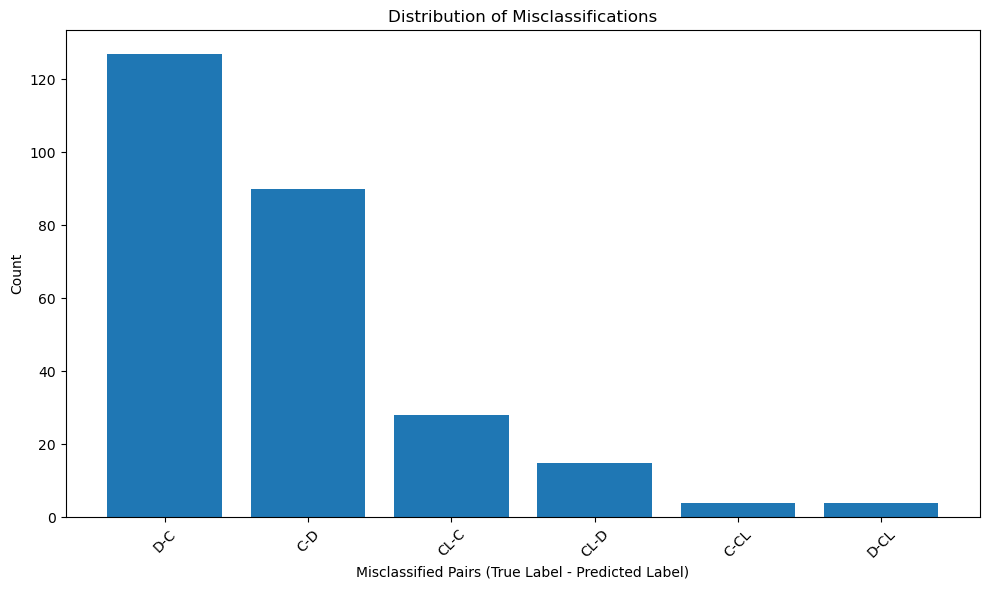

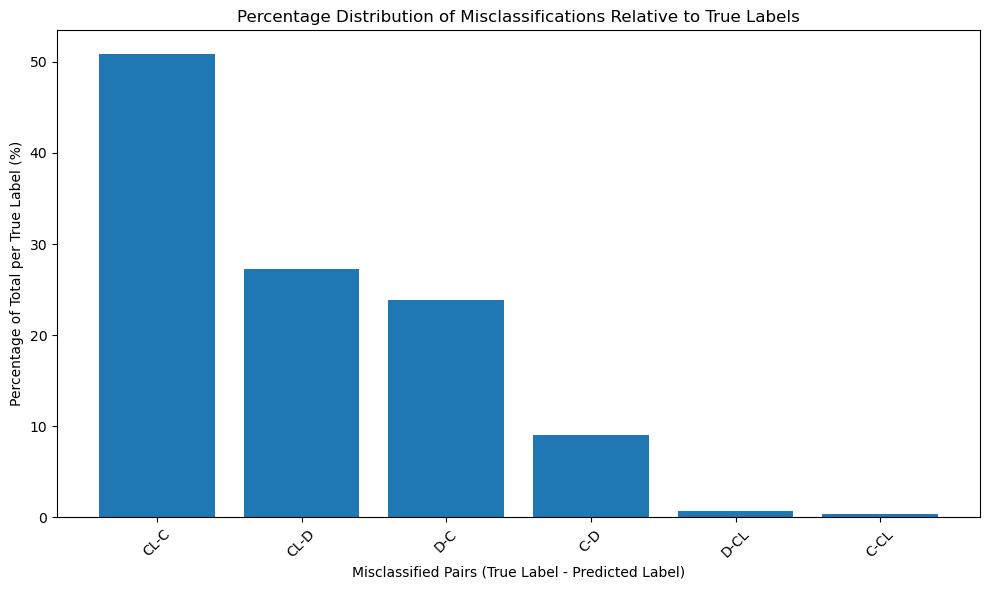

In [115]:
#! Misclassification report and plot
#! Also, re-scale to the minority class (CL) so I can see the % likelihood of misclassification
import matplotlib.pyplot as plt
import pandas as pd

#! Choose model
y_val_pred_model = y_val_pred_best_gb_weighted

# Calculate total instances per class
total_per_class = y_val.value_counts()

# Identify misclassified instances
misclassified = y_val != y_val_pred_model
misclassified_data = X_val_processed[misclassified]
misclassified_true_labels = y_val[misclassified]
misclassified_pred_labels = y_val_pred_model[misclassified]

# Summarize the misclassifications
misclassification_summary = pd.DataFrame({
    'True Label': misclassified_true_labels,
    'Predicted Label': misclassified_pred_labels
})

# Analyze distribution of misclassifications
misclassification_distribution = misclassification_summary.value_counts().reset_index(name='Count')

print(misclassification_distribution)

# Plot distribution of misclassifications
plt.figure(figsize=(10,6))
plt.bar(misclassification_distribution['True Label'].astype(str) + '-' + misclassification_distribution['Predicted Label'].astype(str), 
        misclassification_distribution['Count'])
plt.xlabel('Misclassified Pairs (True Label - Predicted Label)')
plt.ylabel('Count')
plt.title('Distribution of Misclassifications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#! Re-scale to the minority class (CL) so I can see the % likelihood of misclassification
# Count misclassifications per true-predicted pair
misclassification_counts = misclassification_summary.value_counts().reset_index(name='Count')

# Calculate percentage of misclassifications for each true label
misclassification_counts['Total per True Label'] = misclassification_counts['True Label'].apply(lambda x: total_per_class[x])
misclassification_counts['Percentage'] = (misclassification_counts['Count'] / misclassification_counts['Total per True Label']) * 100

# Sorting for better visualization, particularly if focusing on minority classes
misclassification_counts_sorted = misclassification_counts.sort_values(by='Percentage', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(misclassification_counts_sorted['True Label'].astype(str) + '-' + misclassification_counts_sorted['Predicted Label'].astype(str), 
        misclassification_counts_sorted['Percentage'])
plt.xlabel('Misclassified Pairs (True Label - Predicted Label)')
plt.ylabel('Percentage of Total per True Label (%)')
plt.title('Percentage Distribution of Misclassifications Relative to True Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Neural Network Model

Plan: Construct a basic neural network model to compare its performance against the optimized Random Forest model. Design a network architecture suitable for this multi-class classification task, train it on the same dataset, and then evaluate its performance. Use a simple network architecture suitable for this multi-class {C,D,CL} classification task, train it on the same dataset, and then evaluate its performance. #! Need an automated evaluation suite for ease of comparison between models.

1. Define a neural network architecture with an input layer, a few hidden layers, and an output layer suitable for multi-class classification.
2. Compile the model, specify the loss function suitable for multi-class classification across {C,D,CL}, an optimizer, and metrics to monitor.
3. Train the model on the processed training data.
4. Evaluate the model's performance on the validation set.

Basic setup:
    
    Encode -> categorical
    Optimizer -> Adam
    Loss -> cross entropy for categorical
    Model -> basic relu and softmax off-the-shelf
    Metric -> accuracy

Possible improvements:
    
    Skew to reward CL performance metrics across Recall and F1-score

1. **Train the Neural Network:** Trained over a series of epochs, adjusting its weights to minimize the categorical crossentropy loss, which is a common choice for multi-class classification tasks.
    
2. **Evaluate:** Post-training, evaluate the model's accuracy on the validation set (overall classification performance), then check detailed metrics to assess precision, recall, and F1-score for each class, especially the minority CL class.
    
3. **Compare to other models:** Compare NN to the previously developed models (gradient boost and random forest) to determine if NN offers a significant advantage, particularly in handling the minority CL class.

Preliminary results: 
- NN performance varies each run. 
- Sometimes a trained NN state fails to predict any CL cases, preferring to earn 0 score with respect to the minority class in exchange for better performance on the other classes.

In [116]:
import logging
logging.getLogger('absl').setLevel(logging.ERROR)

In [117]:
# Neural Network ("NN") model attempt
from tensorflow.keras.models import Sequential# Model
from tensorflow.keras.layers import Dense# Layer
from tensorflow.keras.optimizers import Adam# Optimizer
from tensorflow.keras.utils import to_categorical# https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
from tensorflow.keras.metrics import CategoricalCrossentropy
from sklearn.preprocessing import LabelEncoder# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

# Encode the target variable "y" as categorical {0, 1, ..., n}, representing the classes {C, D, CL}
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_val_encoded = to_categorical(label_encoder.transform(y_val))

# Define the neural network architecture with Sequential model and Dense layers
nn_model = Sequential([
    Dense(64, input_shape=(X_train_processed.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

# Compile the model https://keras.io/api/optimizers/
nn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])# metrics is a useful indicative measure; the model objective is log_loss (i.e. categorical_crossentropy for 3x classes)

# # Train the model (with verbose reporting to help interpretability)
# history = nn_model.fit(X_train_processed, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_val_processed, y_val_encoded), verbose=2)

# # Try bigger batch that covers the whole dataset (improves from ~78.1 accuracy to ~79.8 accuracy)
# history = nn_model.fit(X_train_processed, y_train_encoded, epochs=50, batch_size=len(X_train_processed), validation_data=(X_val_processed, y_val_encoded), verbose=0)

# Try 60x more epochs for longer training (reduces from ~79.8 to ~71.5 accuracy, but with improved CL performance)
history = nn_model.fit(X_train_processed, y_train_encoded, epochs=3000, batch_size=len(X_train_processed), validation_data=(X_val_processed, y_val_encoded), verbose=0)# verbose=2)

# Evaluate the model on the validation set
val_loss, val_accuracy = nn_model.evaluate(X_val_processed, y_val_encoded, verbose=0)

# Report the result (consider reformatting and print() etc for interpretability)
print('val_loss\n',val_loss,'\n\n', 'val_accuracy\n',val_accuracy)
# Only ~78.1% accuracy at epochs=50, falling to ~71.5% accuracy at epochs=3000
# # This performance seems is poor compared to Random Forest, so NN requires optimization with respect to architecture choice, or other parameters like size, or else give up because NN unlikely to work well on such small datasets.
# # But check whether performance on CL is good or improves with epoch count


#! Bring in the eval suite used for the other models
# Adapt the NN predicted classes (one-hot encoded) back into labelled format for the eval suite
# With respect to each of the three classes {C,D,CL}, evaluate precision, recall, f1-score
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Predict the classes across the validation set from the processed data
y_val_pred = nn_model.predict(X_val_processed)
# Convert the predictions from one-hot encoding to label encoding
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
y_val_true_labels = np.argmax(y_val_encoded, axis=1)

# Calculate accuracy and classification report, scoring predictions against the true validation set labels
accuracy_val_nn = accuracy_score(y_val_true_labels, y_val_pred_labels)
classification_report_val_nn = classification_report(y_val_true_labels, y_val_pred_labels)

# Output the performance metrics
print('val_loss\n',val_loss)#,'\n\n', 'val_accuracy\n',val_accuracy)
print('Neural Network Validation Accuracy:\n', accuracy_val_nn)
print('Neural Network Classification Report:\n', classification_report_val_nn)

# Sometimes a trained NN state fails to predict any CL cases, preferring to earn 0 score with respect to the minority class in exchange for better performance on the other classes
# Other times achieves ~76.6 accuracy

C:\Users\baris\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


val_loss
 2.6365561485290527 

 val_accuracy
 0.7425680160522461
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
val_loss
 2.6365561485290527
Neural Network Validation Accuracy:
 0.7425679949399114
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       993
           1       0.11      0.09      0.10        55
           2       0.66      0.69      0.67       533

    accuracy                           0.74      1581
   macro avg       0.53      0.53      0.53      1581
weighted avg       0.74      0.74      0.74      1581



Example results with fewer training epochs ~1000:

        50/50 [==============================] - 0s 252us/step
        Neural Network Validation Accuracy:
        0.7697659709044908
        Neural Network Classification Report:
                    precision    recall  f1-score   support

                0       0.83      0.84      0.83       993
                1       0.18      0.05      0.08        55
                2       0.68      0.72      0.70       533

        accuracy                            0.77      1581
        macro avg       0.56      0.54      0.54      1581
        weighted avg    0.76      0.77      0.76      1581

In [118]:
#! NN + Class Imbalance techniques to address class imbalance
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping# Early stopping to prevent overfitting. Overfitting can lead to overly confident incorrect predictions, which are heavily penalized in log loss.
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight# https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

# Encode target variables as categorical
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_train_smote_encoded = to_categorical(label_encoder.fit_transform(y_train_smote))
y_val_encoded = to_categorical(label_encoder.transform(y_val))

# Calculate class weights `n_samples / (n_classes * np.bincount(y))`
class_weights = class_weight.compute_class_weight(class_weight='balanced',# If "balanced", class weights will be given by `n_samples / (n_classes * np.bincount(y))`
                                                 classes=np.unique(y_train),
                                                 y=y_train)
class_weights_dict = dict(enumerate(class_weights))

early_stopping = EarlyStopping(monitor='val_loss', patience=900, restore_best_weights=True)

# Neural network architecture
# sigmoid to treat negative values more fairly, dropout to reduce overfitting
nn_model = Sequential([
    Dense(64, input_shape=(X_train_processed.shape[1],), activation='sigmoid'),
    Dropout(0.05),
    Dense(64, activation='sigmoid'),
    Dropout(0.05),
    Dense(y_train_encoded.shape[1], activation='softmax')
])
# nn_model = Sequential([
#     Dense(64, input_shape=(X_train_processed.shape[1],), activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(y_train_encoded.shape[1], activation='softmax')
# ])

# Compile the model https://keras.io/api/optimizers/
nn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with SMOTE_data or with Processed_data+class_weight
history = nn_model.fit(
    # X_train_processed, y_train_encoded, 
    X_train_smote, y_train_smote_encoded,
    epochs=2000,# more epochs improve CL minority class performance at cost of lower overall accuracy and more training time
    # batch_size=len(X_train_processed),# entire training set as the batch size
    batch_size=len(X_train_smote),# smote set is bigger!
    validation_data=(X_val_processed, y_val_encoded),
    # class_weight=class_weights_dict,
    verbose=0,# verbose=2 would report metrics each epoch
    callbacks=[early_stopping]# early stopping to limit overfitting
)
# history = nn_model.fit(X_train_processed, y_train_encoded, epochs=1000,#epochs=50
#                        batch_size=len(X_train_processed), 
#                        validation_data=(X_val_processed, y_val_encoded), 
#                        class_weight=class_weights_dict, verbose=0)

# Evaluate the model as before
val_loss, val_accuracy = nn_model.evaluate(X_val_processed, y_val_encoded, verbose=0)

# Prediction and performance evaluation
y_val_pred = nn_model.predict(X_val_processed)
# Convert the predictions from one-hot encoding to label encoding
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
y_val_true_labels = np.argmax(y_val_encoded, axis=1)

# Calculate accuracy and classification report
accuracy_val_nn = accuracy_score(y_val_true_labels, y_val_pred_labels)
classification_report_val_nn = classification_report(y_val_true_labels, y_val_pred_labels)

# The number of epochs actually run is the length of the history.history['loss'] list
epochs_run = len(history.history['loss'])
print(f"Early stopping occurred after {epochs_run} epochs out of the maximum allowed 2000 epochs.")

# Output the performance metrics
print('val_loss\n',val_loss)#,'\n\n', 'val_accuracy\n',val_accuracy)
print('Neural Network Validation Accuracy:\n', accuracy_val_nn)
print('Neural Network Classification Report:\n', classification_report_val_nn)

C:\Users\baris\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Early stopping occurred after 2000 epochs out of the maximum allowed 2000 epochs.
val_loss
 0.6219531297683716
Neural Network Validation Accuracy:
 0.7469955724225174
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82       993
           1       0.13      0.31      0.19        55
           2       0.69      0.76      0.72       533

    accuracy                           0.75      1581
   macro avg       0.57      0.61      0.58      1581
weighted avg       0.79      0.75      0.76      1581



NN+Class_Weights results, example:

        Early stopping occurred after 389 epochs out of the maximum allowed 2000 epochs.
        val_loss
        0.6236494779586792
        Neural Network Validation Accuracy:
        0.7463630613535737
        Neural Network Classification Report:
                    precision    recall  f1-score   support

                0       0.88      0.78      0.83       993
                1       0.11      0.29      0.16        55
                2       0.70      0.73      0.71       533

            accuracy                           0.75      1581
        macro avg       0.56      0.60      0.57      1581
        weighted avg       0.79      0.75      0.77      1581

## Feature importance analysis (using Random Forest)

From this feature importance analysis, we can recommend which real world data features are most important for clinicians to gather for use with our model.

**Interpret Feature Importance:** Use feature importance results to interpret the impact of different features on the model's predictions. In other cases this could guide clinical understanding, although cirrhosis is already well understood. In our use case, feature importance guides future data collection priorities for use with the model.
    
**Further Data Exploration:** Based on the feature importance, we can revisit the data to explore these key features further, looking for patterns, outliers, or data quality issues that could inform further modeling or data cleaning steps.
    
**Model Refinement:** Could try excluding less important features, creating new features (feature engineering), or adjusting model parameters with a focus on the key features.


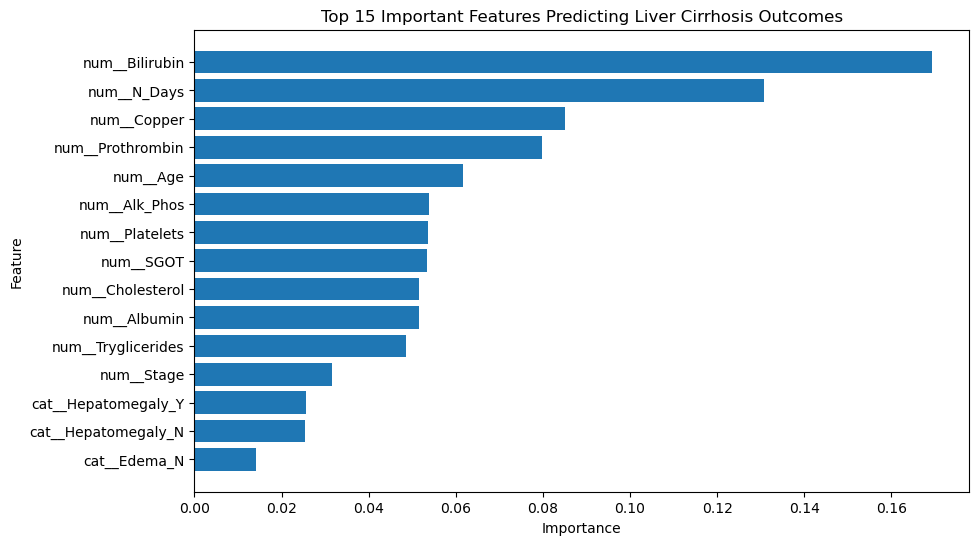

In [119]:
# Identify and visualize the most influential features (i.e. the best discriminative predictors of one class versus another)
import matplotlib.pyplot as plt

# Extract feature importances from the model

# RF model (not the weighted version to keep it general)
feature_importances = rf_classifier.feature_importances_

# # Or choose the tuned models
# feature_importances = best_rf_model_weighted.feature_importances_
# feature_importances = best_gb_model_smote.feature_importances_

# Create a new DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_train_processed_df.columns,
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
num_features = 15
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'][:num_features], features_df['Importance'][:num_features], align='center')
plt.gca().invert_yaxis()# Invert y-axis (puts most important features at the top)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {num_features} Important Features Predicting Liver Cirrhosis Outcomes')
plt.show()

#! TODO write code to re-write the feature name labels nicely

This is for the general case of predicting across C,D,CL, but down-ranks the best predictors of the minority CL class because those features provide little signal to discriminate between the majority of cases C and D.

The overall top features are ranked by their importance scores: 1st `Bilirubin` and 2nd `N_Days`, then 3rd `Copper` and 4th `Prothrombin`. Indeed, these might have been expected to be significant predictors of class C,D,CL given their medical relevance to liver function and disease progression.    

## Confusion Matrices


C:\Users\baris\AppData\Local\Temp\ipykernel_117668\3145207766.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


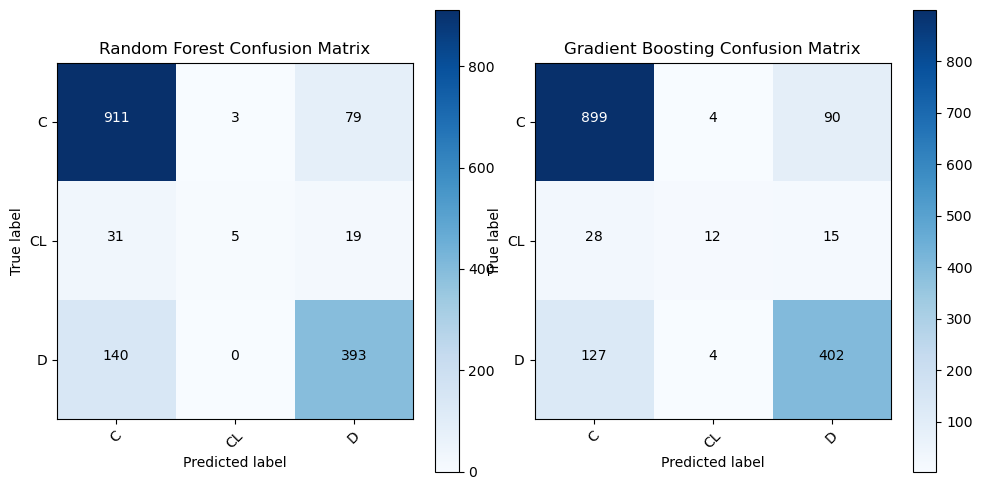

In [120]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Confusion matrices for both models
cm_rf = confusion_matrix(y_val, y_val_pred_rf_weighted)
cm_gb = confusion_matrix(y_val, y_val_pred_best_gb_weighted)

# Plot confusion matrices
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_confusion_matrix(cm_rf, classes=label_encoder.classes_, title='Random Forest Confusion Matrix')

plt.subplot(1, 2, 2)
plot_confusion_matrix(cm_gb, classes=label_encoder.classes_, title='Gradient Boosting Confusion Matrix')

plt.show()

### Curves

#### ROC Curves

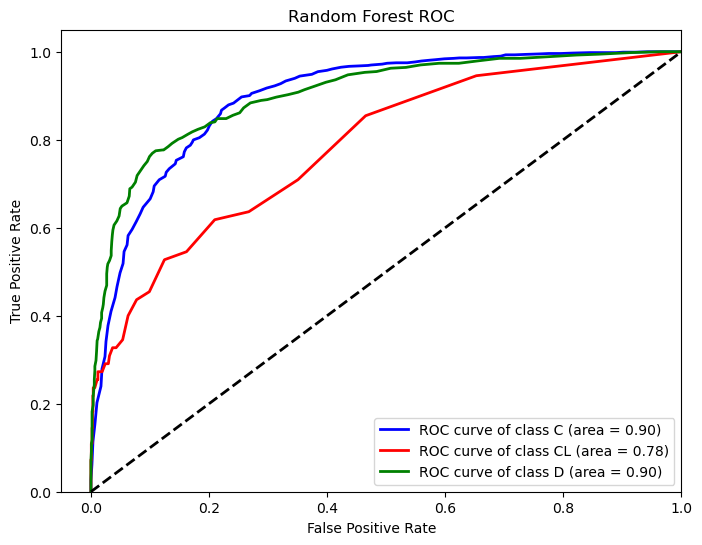

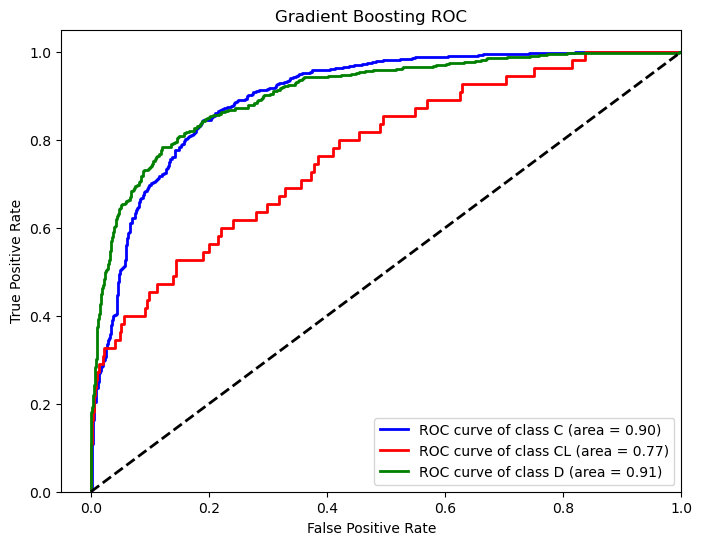

In [121]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve
import matplotlib.pyplot as plt

# Function to plot ROC Curve for each class
def plot_multiclass_roc(y_true, y_pred, classes, title):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(len(classes)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Predict probabilities for each class
y_val_pred_probs_rf = rf_classifier_weighted.predict_proba(X_val_processed)
y_val_pred_probs_gb = gb_classifier.predict_proba(X_val_processed)

# Plot ROC Curve for Random Forest
plot_multiclass_roc(y_val_encoded, y_val_pred_probs_rf, label_encoder.classes_, 'Random Forest ROC')

# Plot ROC Curve for Gradient Boosting
plot_multiclass_roc(y_val_encoded, y_val_pred_probs_gb, label_encoder.classes_, 'Gradient Boosting ROC')

#### Precision-Recall Curves

Precision-Recall Curves now, to identify positive instances of each class, which is critical given the class imbalance in our dataset. Can analyze these curves to determine which model is more effective at identifying the minority class while maintaining a reasonable level of precision overall. 

​​They're all pretty bad at CL it seems, unless I'm reading them incorrectly.

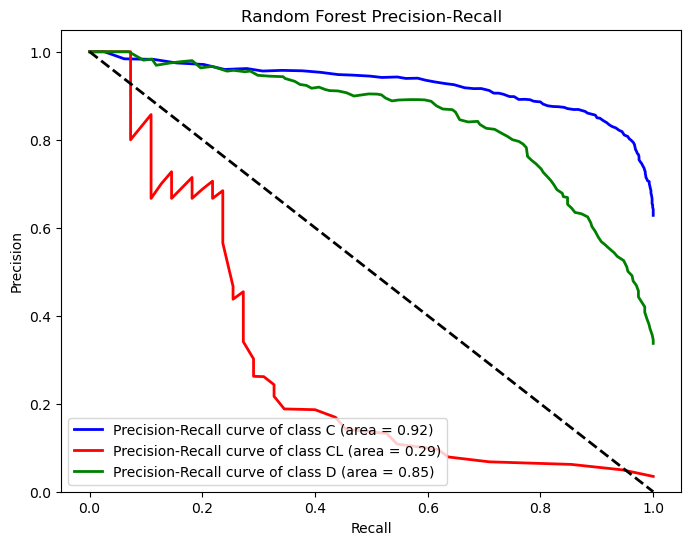

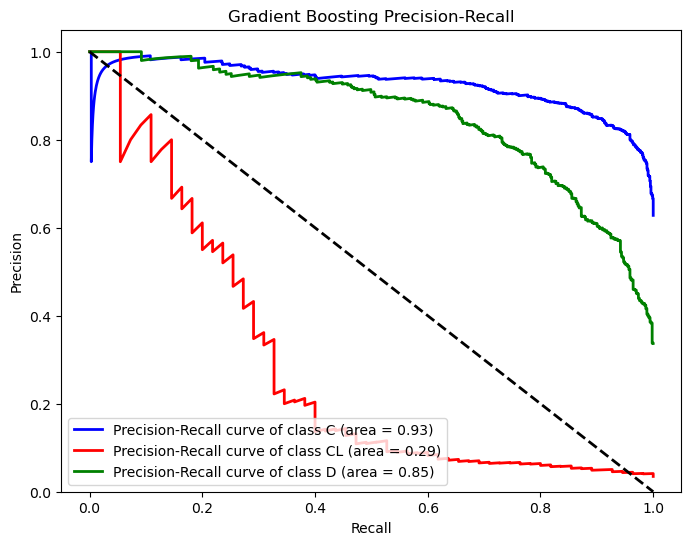

In [123]:
# Precision-Recall Curves for RF and GB
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to plot Precision-Recall Curve for each class
def plot_precision_recall_curve(y_true, y_pred, classes, title):
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(classes)):
        precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], y_pred[:, i])
        average_precision[i] = average_precision_score(y_true[:, i], y_pred[:, i])

    # Plot all Precision-Recall curves
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(len(classes)), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label=f'Precision-Recall curve of class {classes[i]} (area = {average_precision[i]:0.2f})')

    plt.plot([0, 1], [1, 0], 'k--', lw=2)
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="lower left")
    plt.show()

# Plot Precision-Recall Curve for Random Forest
plot_precision_recall_curve(y_val_encoded, y_val_pred_probs_rf, label_encoder.classes_, 'Random Forest Precision-Recall')

# Plot Precision-Recall Curve for Gradient Boosting
plot_precision_recall_curve(y_val_encoded, y_val_pred_probs_gb, label_encoder.classes_, 'Gradient Boosting Precision-Recall')